##Settings

In [ ]:
#covid_rl_v0.7_part1_LCTC_image_reproducing (last).ipynb의 사본의 사본 2020 09의 사본

In [ ]:
##depending on choice for particular submissions : you can change the font family
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Helvetica"

# plt.rcParams["font.family"] = "sans-serif"
# plt.rcParams["font.family"] = "Arial"
# plt.rcParams["font.family"] = "Times"
# plt.rcParams["font.family"] = "Times New Roman"

In [ ]:
##Although you can still check on the deivce settings, we downgraded tensorflow version to 1.15 for less error. 
##I also needed to change a bit for below tensorflow area to solve the error because of the version update.
!pip install tensorflow==1.15.0
!pip install tensorflow-gpu==1.15.0
!pip install tensorflow_probability==0.7.0

'!pip install tensorflow==1.15.0\n!pip install tensorflow-gpu==1.15.0\n!pip install tensorflow_probability==0.7.0'

## Data Preprocessing

In [ ]:
#when you have a new data, these are supposed to be merged.
#this part is based on jupyter, google colab, but if not you can simply remove 'from google.colab ~, drive.amount ~ ' part.
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive', force_remount=True)
import pandas as pd
import numpy as np
import gc
gc.collect()

df_read = 'COVID-19_population.csv'; population_1 = pd.read_csv(df_read)
df_read = 'COVID-19_gdp.csv'; gdp_1 = pd.read_csv(df_read)
df_read = 'COVID-19_testing.csv'; test_1 = pd.read_csv(df_read)
test_1.drop_duplicates()
test_1.rename(columns={'Date':'date','testing':'TP1'}, inplace=True)
test_1['date'] = pd.to_datetime(test_1['date'], format='%d/%m/%Y')

df_read = 'recovered.csv'; df_recovered = pd.read_csv(df_read)
df_read = 'confirmed.csv'; df_confirmed = pd.read_csv(df_read)
df_read = 'deaths.csv'; df_deaths = pd.read_csv(df_read)
df_read = 'df_date.csv'; df_date = pd.read_csv(df_read)
df_date = pd.to_datetime(df_date['date'], format='%d/%m/%y')

df_confirmed['Region'] = df_confirmed[['Country/Region', 'Province/State']].astype(str).apply(lambda x: ' '.join(x), axis=1)
df_place = df_confirmed[['Country/Region', 'Province/State','Territories','Region', 'Lat', 'Long']]
df_place = df_place.drop_duplicates()
df_recovered['Region'] = df_recovered[['Country/Region', 'Province/State']].astype(str).apply(lambda x: ' '.join(x), axis=1)
df_deaths['Region'] = df_deaths[['Country/Region', 'Province/State']].astype(str).apply(lambda x: ' '.join(x), axis=1)

df_read = 'LifeExpectancy.csv'; df_life = pd.read_csv(df_read)

Mounted at /content/gdrive


,Territories,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,Region
0,NaN,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,Afghanistan nan
1,NaN,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,Albania nan
2,NaN,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,Algeria nan
3,NaN,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,Andorra nan
4,NaN,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,Angola nan


In [ ]:
len(np.unique(df_place['Country/Region']))

208

In [ ]:
# select the time frame you want to see
# the country names are sometimes differently written per documents. It's recommended to check those.
# also, when you have a time data from csv files, sometimes, these are written incorrectly. It's also recommended to be checked.
# checking the index can be also one of the things we can do.

time = ['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20'] 
df_confirmed = df_confirmed.groupby(['Country/Region', 'Lat', 'Long'])[time].sum().reset_index().drop_duplicates()
df_recovered = df_recovered.groupby(['Country/Region', 'Lat', 'Long'])[time].sum().reset_index().drop_duplicates()
df_deaths = df_deaths.groupby(['Country/Region', 'Lat', 'Long'])[time].sum().reset_index().drop_duplicates()


In [ ]:
df_read = 'Lockdown.csv'; Lockdown_d3_1 = pd.read_csv(df_read)
df_read = 'Travel.csv'; Travel_d3_1 = pd.read_csv(df_read)
Lockdown_s3_1 = pd.read_csv(df_read)
Travel_s3_1 = pd.read_csv(df_read)
Travel_s3_1.head()

,Country/Region,TC1,TC2,TW1,TW2
0,Afghanistan,21.0,NaN,76,99
1,Albania,0.0,8.0,68,76
2,Algeria,NaN,NaN,99,99
3,Andorra,NaN,NaN,99,99
4,Angola,-1.0,-1.0,80,80


In [ ]:
# see how many countries had small numbers of patients or no serious actions at all.
# so that when we compare the results and interpret the things, the interpretation can be less over affected by the number of countries with those cases.
Lockdown_s3_1[Lockdown_s3_1.LC1 < 0]['Country/Region'].value_counts()

El Salvador                         1
Anguilla                            1
Grenada                             1
Sao Tome and Principe               1
Latvia                              1
Romania                             1
MS Zaandam                          1
Mongolia                            1
Slovakia                            1
Mali                                1
Zimbabwe                            1
Malawi                              1
South Sudan                         1
Bonaire, Sint Eustatius and Saba    1
Georgia                             1
Sierra Leone                        1
Syria                               1
Falkland Islands (Malvinas)         1
Botswana                            1
Name: Country/Region, dtype: int64

In [ ]:
df_confirmed = df_confirmed.drop(columns=['Lat', 'Long'])
df_recovered = df_recovered.drop(columns=['Lat', 'Long'])
df_deaths = df_deaths.drop(columns=['Lat', 'Long'])

In [ ]:
Lockdown_d3_1_unpivoted = Lockdown_d3_1.melt(id_vars=['Country/Region'], var_name='date', value_name='lockdown_d3')
Travel_d3_1_unpivoted = Travel_d3_1.melt(id_vars=['Country/Region'], var_name='date', value_name='travel_d3')
Lockdown_s3_1_unpivoted = Lockdown_s3_1.melt(id_vars=['Country/Region'], var_name='date', value_name='lockdown_s3')
Travel_s3_1_unpivoted = Travel_s3_1.melt(id_vars=['Country/Region'], var_name='date', value_name='travel_s3')

Lockdown_d3_1_unpivoted['date'] = pd.to_datetime(Lockdown_d3_1_unpivoted['date'], format="%d/%m/%Y")
Travel_d3_1_unpivoted['date'] = pd.to_datetime(Travel_d3_1_unpivoted['date'], format="%d/%m/%Y")

df_confirmed_unpivoted = df_confirmed.melt(id_vars=['Country/Region'], var_name='date', value_name='confirmed')
df_recovered_unpivoted = df_recovered.melt(id_vars=['Country/Region'], var_name='date', value_name='recovered')
df_deaths_unpivoted = df_deaths.melt(id_vars=['Country/Region'], var_name='date', value_name='deaths')

df_confirmed_unpivoted['date'] = pd.to_datetime(df_confirmed_unpivoted['date'], format='%m/%d/%y')
df_recovered_unpivoted['date'] = pd.to_datetime(df_recovered_unpivoted['date'], format='%m/%d/%y')
df_deaths_unpivoted['date'] = pd.to_datetime(df_deaths_unpivoted['date'], format='%m/%d/%y')

df_unpivoted0 = df_confirmed_unpivoted.merge(df_date, how='left', left_on=['date'], right_on=['date'])
df_unpivoted1 = df_unpivoted0.merge(df_recovered_unpivoted, how='left', left_on=['Country/Region', 'date'], right_on=['Country/Region', 'date'])
df_unpivoted2 = df_unpivoted1.merge(df_deaths_unpivoted, how='left', left_on=['Country/Region', 'date'], right_on=['Country/Region', 'date'])


In [ ]:
# For this type of studies, conventaionally interpolation was normally with linear or the most recent, but it's good to think the direction of interpolation.
Lockdown_d3_1_unpivoted['lockdown_d3'] = (Lockdown_d3_1_unpivoted.groupby('Country/Region')['lockdown_d3'].apply(lambda x: x.interpolate(method='linear', limit_direction='forward')))
Travel_d3_1_unpivoted['travel_d3'] = (Travel_d3_1_unpivoted.groupby('Country/Region')['travel_d3'].apply(lambda x: x.interpolate(method='linear', limit_direction='forward')))
Lockdown_d3_1_unpivoted['lockdown_d3'] = Lockdown_d3_1_unpivoted['lockdown_d3'].fillna(0)
Travel_d3_1_unpivoted['travel_d3'] = Travel_d3_1_unpivoted['travel_d3'].fillna(0)

,Country/Region,date,lockdown_d3
0,Afghanistan,2020-01-03,0.0
1,Albania,2020-01-03,0.0
2,Algeria,2020-01-03,0.0
3,Andorra,2020-01-03,0.0
4,Angola,2020-01-03,0.0
...,...,...,...
20539,Falkland Islands (Malvinas),2020-04-07,1.8
20540,Gibraltar,2020-04-07,0.0
20541,Isle of Man,2020-04-07,1.8
20542,Montserrat,2020-04-07,0.0


In [ ]:
df_unpivoted3 = df_unpivoted2.merge(Lockdown_d3_1_unpivoted, how='left', left_on=['Country/Region', 'date'], right_on=['Country/Region', 'date'])
df_unpivoted4 = df_unpivoted3.merge(Travel_d3_1_unpivoted, how='left', left_on=['Country/Region', 'date'], right_on=['Country/Region', 'date'])

df_unpivoted4[['confirmed','recovered','deaths']] = df_unpivoted4.groupby('Country/Region')[['confirmed','recovered','deaths']].apply(lambda x: x.interpolate(method='linear', limit_direction='forward'))
df_unpivoted4[['confirmed','recovered','deaths']] = df_unpivoted4.groupby('Country/Region')[['confirmed','recovered','deaths']].transform(lambda x: x.rolling(3, 1).mean())
df_unpivoted4[['confirmed','recovered','deaths']] = df_unpivoted4[['confirmed','recovered','deaths']].fillna(0.0) 

df_unpivoted4[['lockdown_d3','travel_d3']] = df_unpivoted4[['lockdown_d3','travel_d3']].fillna(0)
df_unpivoted4 = df_unpivoted4.sort_values(['Country/Region', 'date'])

df_unpivoted3 = df_unpivoted2.merge(Lockdown_d3_1_unpivoted, how='left', left_on=['Country/Region', 'date'], right_on=['Country/Region', 'date'])
df_unpivoted4 = df_unpivoted3.merge(Travel_d3_1_unpivoted, how='left', left_on=['Country/Region', 'date'], right_on=['Country/Region', 'date'])
df_unpivoted4 = df_unpivoted4.reset_index(drop=True)
df_unpivoted4.head(2)

In [ ]:
#we removed the previous data which no longer useful because of the memory problems.
del df_recovered, df_confirmed, df_deaths, Lockdown_d3_1, Travel_d3_1
del df_confirmed_unpivoted, df_recovered_unpivoted, df_deaths_unpivoted
del df_unpivoted0, df_unpivoted1, df_unpivoted2, df_unpivoted3

In [ ]:
# start to merge every components in one data file.
df_unpivoted4 = df_unpivoted4.merge(df_place[['Country/Region', 'Lat', 'Long']], how='left', left_on=['Country/Region'], right_on=['Country/Region'])
df_unpivoted4 = df_unpivoted4.merge(population_1, how='left', left_on=['Country/Region'], right_on=['Country/Region'])
df_unpivoted4 = df_unpivoted4.merge(gdp_1, how='left', left_on=['Country/Region'], right_on=['Country/Region'])
df_unpivoted4 = df_unpivoted4.merge(test_1, how='left', left_on=['Country/Region', 'date'], right_on=['Country/Region', 'date'])
df_unpivoted4 = df_unpivoted4.merge(df_life, how='left', left_on=['Country/Region'], right_on=['Country/Region'])

df_unpivoted4 = df_unpivoted4.sort_values(['Country/Region', 'date'])
df_unpivoted4 = df_unpivoted4.drop_duplicates()

In [ ]:
# cases per population (1000)
# for severity, we check that at the last day of the observation which was 2020-04-07 for us.

df_unpivoted4['confirmed_outof_pp'] = df_unpivoted4['confirmed']/df_unpivoted4['PP']*1000
df_unpivoted4['recovered_outof_pp'] = df_unpivoted4['recovered']/df_unpivoted4['PP']*1000
df_unpivoted4['deaths_outof_pp'] = df_unpivoted4['deaths']/df_unpivoted4['PP']*1000

df_unpivoted4['deaths_outof_confirmed'] = df_unpivoted4['deaths']/df_unpivoted4['confirmed']
df_unpivoted4['recovered_outof_confirmed'] = df_unpivoted4['recovered']/df_unpivoted4['confirmed']

df_unpivoted4 = df_unpivoted4.sort_values(['Country/Region', 'date'])
df_unpivoted4 = df_unpivoted4.reset_index(drop=True)

df_death_sign4_not0 = pd.DataFrame(pd.qcut(df_unpivoted4[(df_unpivoted4['date'] == '2020-04-07') & (df_unpivoted4['deaths_outof_pp'] != 0)]['deaths_outof_pp'], 3, labels = [1,2,3]))
df_death_sign4_not0.rename(columns={'deaths_outof_pp':'sign4'}, inplace=True)
df_death_sign4_0 = pd.DataFrame(pd.qcut(df_unpivoted4[(df_unpivoted4['date'] == '2020-04-07') & (df_unpivoted4['deaths_outof_pp'] == 0)]['deaths_outof_pp'], 1, labels = [0]))
df_death_sign4_0.rename(columns={'deaths_outof_pp':'sign4'}, inplace=True)

df_death_country_not0 = pd.DataFrame(df_unpivoted4[(df_unpivoted4['date'] == '2020-04-07') & (df_unpivoted4['deaths_outof_pp'] != 0)]['Country/Region'])
df_death_country_0 = pd.DataFrame(df_unpivoted4[(df_unpivoted4['date'] == '2020-04-07') & (df_unpivoted4['deaths_outof_pp'] == 0)]['Country/Region'])
df_death_sign4_country_not0 = pd.concat([df_death_country_not0,df_death_sign4_not0], axis = 1)
df_death_sign4_country_0 = pd.concat([df_death_country_0,df_death_sign4_0], axis = 1)
df_death_sign4_country = pd.concat([df_death_sign4_country_not0,df_death_sign4_country_0])

df_unpivoted4 = df_unpivoted4.merge(df_death_sign4_country, how='left', left_on=['Country/Region'], right_on=['Country/Region'])


In [ ]:
## if there is a ready data to upload

## Basic Analysis

In [ ]:

df_unpivoted4[df_unpivoted4.sign4 == 3][['confirmed_outof_pp', 'deaths_outof_pp']].describe().T
sign = 3

np.nanmedian(df_unpivoted4[(df_unpivoted4.sign4 == sign)&(df_unpivoted4.date == '2020-04-07')]['confirmed_outof_pp']),\
np.nanmedian(df_unpivoted4[(df_unpivoted4.sign4 == sign)&(df_unpivoted4.date == '2020-04-07')]['deaths_outof_pp'])



df_unpivoted4[(df_unpivoted4.sign4 == sign)&(df_unpivoted4.date == '2020-04-07')]['deaths_outof_pp'].describe().T

np.nanmedian(df_unpivoted4[(df_unpivoted4.sign4 == sign)&(df_unpivoted4.date == '2020-04-07')]['deaths']),\
np.nanmedian(df_unpivoted4[(df_unpivoted4.sign4 == sign)&(df_unpivoted4.date == '2020-04-07')]['PP']),\
np.nanmedian(df_unpivoted4[(df_unpivoted4.sign4 == sign)&(df_unpivoted4.date == '2020-04-07')]['deaths_outof_pp']),\
np.nanmedian(df_unpivoted4[(df_unpivoted4.sign4 == sign)&(df_unpivoted4.date == '2020-04-07')]['deaths_outof_pp']/1000)

df_unpivoted4[df_unpivoted4.sign4 == 0].describe().T
sign = 3
np.nanmedian(df_unpivoted4[(df_unpivoted4.sign4 == sign)&(df_unpivoted4.date == '2020-04-07')]['PM']),\ # for them it's same with and without
np.nanmedian(df_unpivoted4[df_unpivoted4.sign4 == sign]['PD']),\
np.nanmedian(df_unpivoted4[df_unpivoted4.sign4 == sign]['PP']),\
np.nanmedian(df_unpivoted4[df_unpivoted4.sign4 == sign]['GDP']),\
np.nanmedian(df_unpivoted4[df_unpivoted4.sign4 == sign]['TP1']),\
np.nanmedian(df_unpivoted4[df_unpivoted4.sign4 == sign]['LifeExpectancy'])


(63.0, 8607442.5, 0.012983937995413775, 1.2983937995413774e-05)

##Train, Valid, Text division

In [ ]:
ids = df_unpivoted4[(df_unpivoted4['date'] == '2020-04-07') & ((df_unpivoted4['lockdown_d3'] < 1) & (df_unpivoted4['travel_d3'] < 1) & (df_unpivoted4['confirmed'] < 100))]['Country/Region'].unique()
ids, len(ids)
df_unpivoted4 = df_unpivoted4.loc[~df_unpivoted4['Country/Region'].isin(ids)]


##Figures

22599    2557.0
dtype: float64
16


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: MaxNLocator.set_params got an unexpected parameter: n


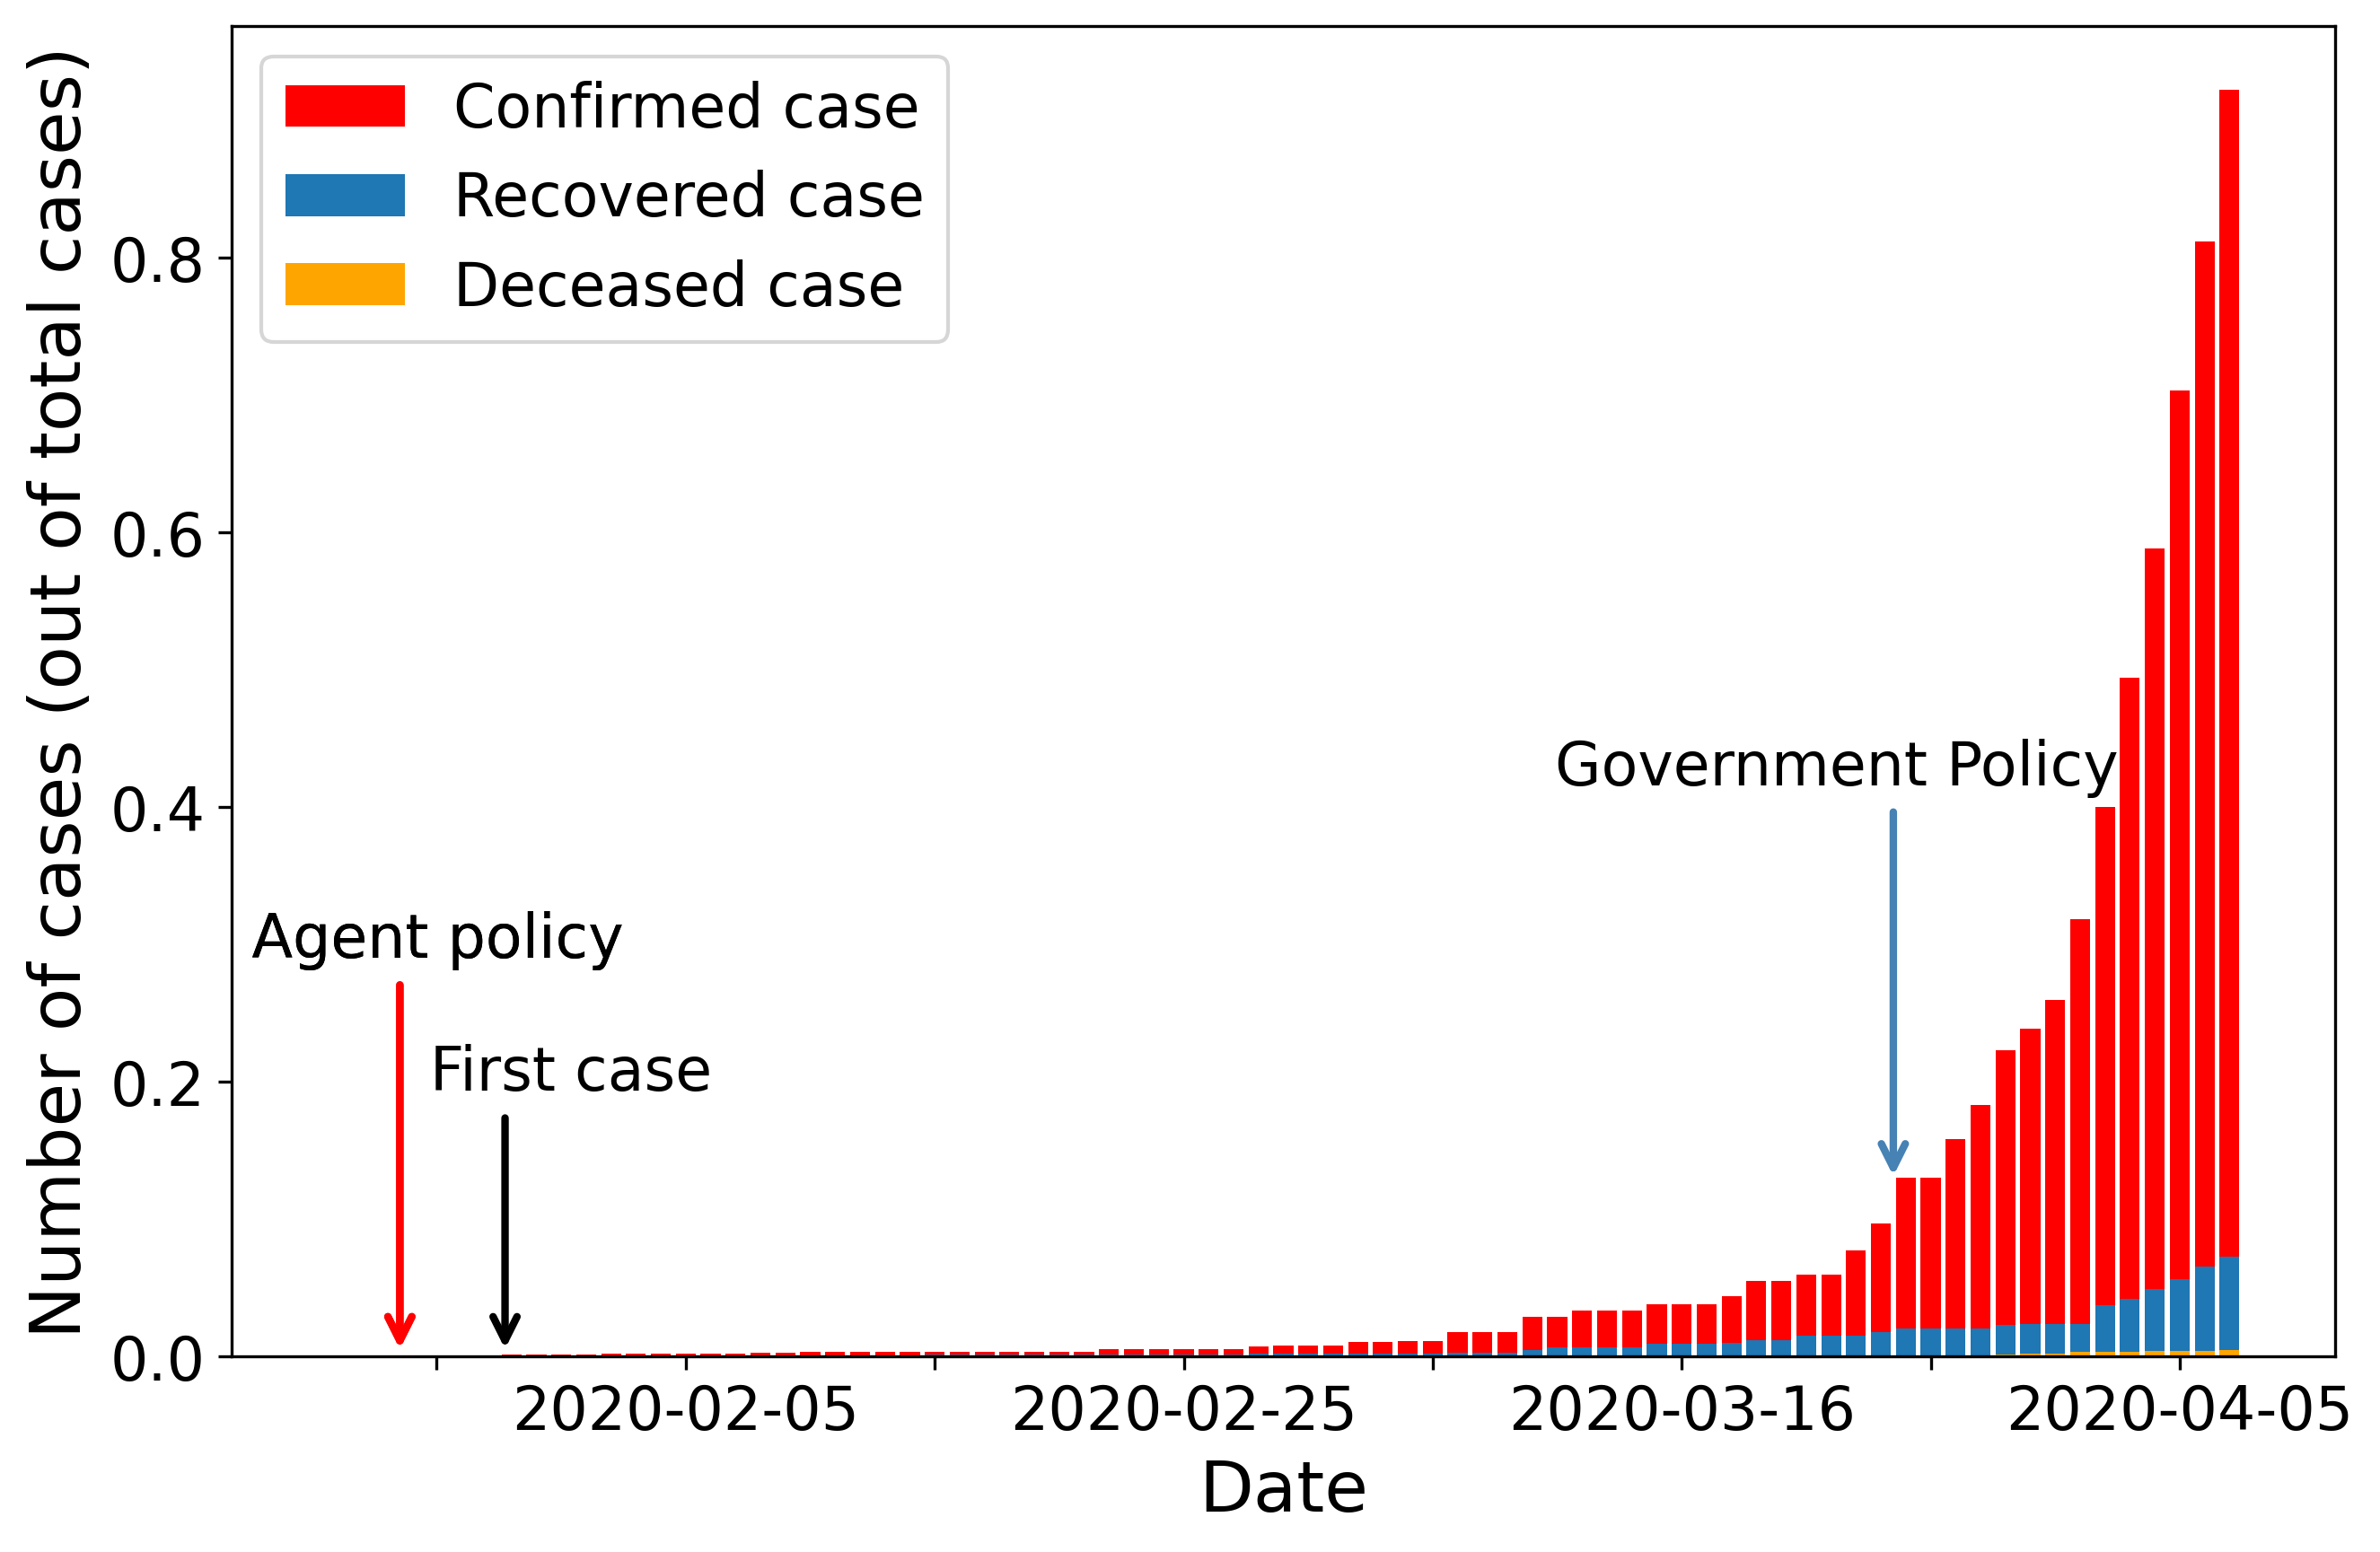

In [ ]:
#In the paper, we tried not to specify which country performed significantly different from agent's suggestions.
#Accordingly, I'm sorry that I have to say that the naming below has also arbitrary changed. But, you may change those for your own purpose.
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker

text_ = 'Country 1'
fig = plt.figure(figsize = (9, 6), dpi = 300)
ax = fig.add_subplot(1,1,1)
c1 = (df_unpivoted4[(df_unpivoted4['Country/Region'] == text_) & (df_unpivoted4['date'] == '2020-04-07')]['confirmed']+\
      df_unpivoted4[(df_unpivoted4['Country/Region'] == text_) & (df_unpivoted4['date'] == '2020-04-07')]['recovered']+\
      df_unpivoted4[(df_unpivoted4['Country/Region'] == text_) & (df_unpivoted4['date'] == '2020-04-07')]['deaths'])
print (c1)

bf = 19; sf = 16
x_data = df_unpivoted4[df_unpivoted4['Country/Region'] == text_]['date']
y_data = df_unpivoted4[df_unpivoted4['Country/Region'] == text_]['confirmed']/2557.0
ax.bar(x_data, y_data, color = 'red', label = "Confirmed case")

x_data = df_unpivoted4[df_unpivoted4['Country/Region'] == text_]['date']
y_data = df_unpivoted4[df_unpivoted4['Country/Region'] == text_]['recovered']/2557.0
ax.bar(x_data, y_data, label = "Recovered case")

x_data = df_unpivoted4[df_unpivoted4['Country/Region'] == text_]['date']
y_data = df_unpivoted4[df_unpivoted4['Country/Region'] == text_]['deaths']/2557.0
ax.bar(x_data, y_data, color = 'orange', label = "Deceased case")

ax.xaxis.set_major_locator(plt.MaxNLocator(n=5))

every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(sf) 
                tick.label.set_rotation(0)

for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(sf) 

ax.set_xlabel('Date', fontsize = bf)
ax.set_ylabel('Number of cases (out of total cases)', fontsize = bf)

ax.legend(loc=2, prop={'size': sf})
plt.tight_layout()

if text_ == 'Country 1' : 
  ax.annotate('    Agent policy', xy=(0.08, 0), xycoords='axes fraction', xytext=(0.08, 0.3), 
            fontsize = sf, horizontalalignment="center", arrowprops=dict(arrowstyle="->", lw = 2, color='red'))
  ax.annotate('    Agent policy', xy=(0.08, 0), xycoords='axes fraction', xytext=(0.08, 0.3), 
            fontsize = sf, horizontalalignment="center", arrowprops=dict(arrowstyle="->", lw = 2, color='red'))
  ax.annotate('       First case', xy=(0.13, 0), xycoords='axes fraction', xytext=(0.13, 0.2), 
            fontsize = sf, horizontalalignment="center", arrowprops=dict(arrowstyle="->", lw = 2, color='black'))
  ax.annotate('Government Policy      ', xy=(0.79, 0.13), xycoords='axes fraction', xytext=(0.79, 0.43), 
            fontsize = sf, horizontalalignment="center", arrowprops=dict(arrowstyle="->", lw = 2, color='steelblue'))
elif text_ == 'Country 2' : 
  ax.annotate('Agent policy    ', xy=(0.72, 0.35), xycoords='axes fraction', xytext=(0.72, 0.75), 
            fontsize = sf, horizontalalignment="center", arrowprops=dict(arrowstyle="->", lw = 2, color='red'))
  ax.annotate('First case', xy=(0.545, 0), xycoords='axes fraction', xytext=(0.545, 0.3), 
            fontsize = sf, horizontalalignment="center", arrowprops=dict(arrowstyle="->", lw = 2, color='black'))
  ax.annotate('Government Policy         ', xy=(0.71, 0.35), xycoords='axes fraction', xytext=(0.71, 0.65), 
            fontsize = sf, horizontalalignment="center", arrowprops=dict(arrowstyle="->", lw = 2, color='steelblue'))
elif text_ == 'Country 3' : 
  ax.annotate('Agent policy    ', xy=(0.83, 0.35), xycoords='axes fraction', xytext=(0.83, 0.75), 
            fontsize = sf, horizontalalignment="center", arrowprops=dict(arrowstyle="->", lw = 2, color='red'))
  ax.annotate('      First case', xy=(0.05, 0), xycoords='axes fraction', xytext=(0.05, 0.3), 
            fontsize = sf, horizontalalignment="center", arrowprops=dict(arrowstyle="->", lw = 2, color='black'))
  ax.annotate('  Government Policy', xy=(0.18, 0.0), xycoords='axes fraction', xytext=(0.18, 0.2),  #weight='bold', 
            fontsize = sf, horizontalalignment="center", arrowprops=dict(arrowstyle="->", lw = 2, color='steelblue'))


#fig.savefig('Country_'+text_+'_text.png', dpi = 300)


In [ ]:
df_hml = Travel_s3_1.merge(Lockdown_s3_1, how='left', left_on=['Country/Region'], right_on=['Country/Region'])
df_hml = df_hml.merge(df_unpivoted4[df_unpivoted4.date == '2020-04-07'], how='left', left_on=['Country/Region'], right_on=['Country/Region'])

df_hml = df_hml[['Country/Region','TC1', 'TC2', 'TW1', 'TW2', 'LC1', 'LC2', 'LW1', 'LW2',
       'date', 'confirmed', 'recovered', 'deaths', 'lockdown_d3', 'travel_d3',
       'PM', 'PD', 'PP', 'GDP',  'Lat', 'Long', 'confirmed_outof_pp',
       'recovered_outof_pp', 'deaths_outof_pp', 'deaths_outof_confirmed',
       'recovered_outof_confirmed']]

df_hml = df_hml.merge(df_death_sign4_country, how='left', left_on=['Country/Region'], right_on=['Country/Region'])
df_hml = df_hml.drop_duplicates()
print(df_hml['sign4'].value_counts())

df_hml['TW1_'] = pd.cut(df_hml['TW1'], 3, labels = [0,1,2])
df_hml['TW2_'] = pd.cut(df_hml['TW2'], 3, labels = [0,1,2])
df_hml['TC1_'] = pd.cut(df_hml['TC1'], 3, labels = [0,1,2])
df_hml['TC2_'] = pd.cut(df_hml['TC2'], 3, labels = [0,1,2])
df_hml['LW1_'] = pd.cut(df_hml['LW1'], 3, labels = [0,1,2])
df_hml['LW2_'] = pd.cut(df_hml['LW2'], 3, labels = [0,1,2])
df_hml['LC1_'] = pd.cut(df_hml['LC1'], 3, labels = [0,1,2])
df_hml['LC2_'] = pd.cut(df_hml['LC2'], 3, labels = [0,1,2])

# Timing for Country level
import matplotlib.pyplot as plt
import seaborn as sns
#text = 'LW2'
texts = ['LW2', 'LW1', 'LC2', 'LC1', 'TW2', 'TW1', 'TC2', 'TC1']

bf = 19; sf = 16
for text in texts : 
  x1 = list(df_hml[df_hml['sign4'] == 0][text])
  x2 = list(df_hml[df_hml['sign4'] == 1][text])
  x3 = list(df_hml[df_hml['sign4'] == 2][text])
  x4 = list(df_hml[df_hml['sign4'] == 3][text])

  names = ['Low', 'Medium', 'High', 'Critical']
  kwargs = dict(hist_kws={'alpha':.6}, bins = 40, kde_kws={'linewidth':2})
  plt.figure(figsize=(9,6.5), dpi = 100) #300

  sns.kdeplot(x1, color="dodgerblue", label=names[0])
  sns.kdeplot(x2, color="gold", label=names[1])
  sns.kdeplot(x3, color="darkorange", label=names[2])
  sns.kdeplot(x4, color="crimson", label=names[3])
  if text == 'LW2' : c1 = 20;c2 = 100 
  elif text == 'LW1' : c1 = 0 ;c2 = 100
  elif text == 'LC1' : c1 = -40 ;c2 = 80
  elif text == 'LC2' : c1 = 0 ;c2 = 80
  elif text == 'TC1' : c1 = -50 ;c2 = 80
  elif text == 'TC2' : c1 = 0 ;c2 = 90
  elif text == 'TW1' : c1 = 0 ;c2 = 100
  elif text == 'TW2' : c1 = 30 ;c2 = 100
  plt.xlim(xmin=c1,xmax=c2)

  plt.xticks(fontsize = sf)
  plt.yticks(fontsize = sf)
  plt.legend(prop={'size': sf}, title_fontsize=(sf+1), fancybox=True, title="Severity")
  if (text == 'LW2') or (text == 'LW1') or (text == 'TW2') or (text == 'TW1') : 
    plt.xlabel('Days from 31st December 2019', fontsize = bf) #fontname="Arial", 
  elif (text == 'LC2') or (text == 'LC1') or (text == 'TC2') or (text == 'TC1') : 
    plt.xlabel('Days from the index case date for each country and territory', fontsize = bf) #fontname="Arial",

  plt.ylabel('Number of countries and territories', fontsize = bf) #fontname="Arial",

  plt.tight_layout()


In [ ]:
from PIL import Image
#if you need to change RGB to CMYK
for text_ in texts : 
  read_dir = 'RGB.png'
  image = Image.open(read_dir).convert("CMYK")
  image.save('CMYK.jpeg')


GP_1


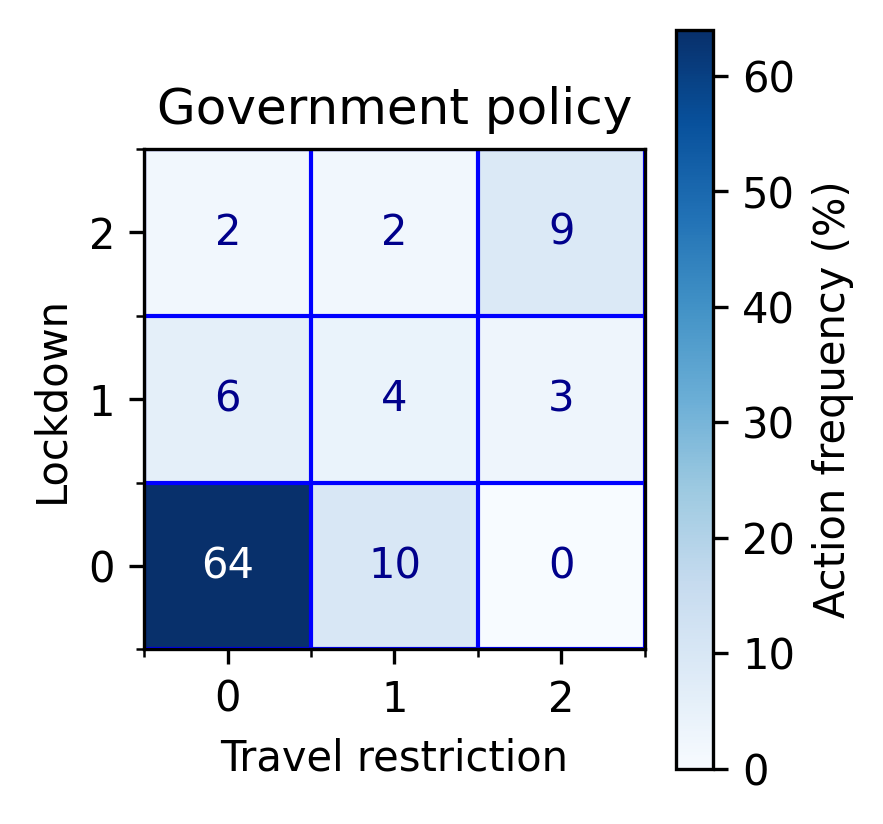

In [ ]:
GP_1 = np.array([[0.64,	0.1,	0.0],[0.06,	0.04,	0.03],[0.02,	0.02,	0.09]])
GP_2 = np.array([[0.25,	0.21,	0.0],[0.11,	0.09,	0.06],[0.04,	0.05,	0.19]])
AP_1 = np.array([[0.11,	0.12,	0.02],[0.02,	0.21,	0.22],[0.07,	0.05,	0.16]])
AP_2 = np.array([[0.11,	0.12,	0.02],[0.02,	0.24,	0.17],[0.06,	0.08,	0.19]])

GP_1 = np.array([[64,	10,	0],[6,	4,	3],[2,	2,	9]])
GP_2 = np.array([[25,	21,	0],[11,	9,	6],[4,	5,	19]])
AP_1 = np.array([[11,	12,	2],[2,	21,	22],[7,	5,	16]])
AP_2 = np.array([[11,	12,	2],[2,	24,	17],[6,	8,	19]])

texts = ['GP_1'] #, 'AP_1', 'AP_2'] 
for text_ in texts : 
  print(text_)
  if text_ == 'GP_1' : data = GP_1
  elif text_ == 'GP_2' : data = GP_2
  elif text_ == 'AP_1' : data = AP_1
  elif text_ == 'AP_2' : data = AP_2
    
  f, (ax1) = plt.subplots(1, 1, figsize=(3,3), dpi=300)
  x_edges = np.arange(-0.5,3)
  y_edges = np.arange(-0.5,3)
  ax1.imshow(np.flipud(data), cmap="Blues",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])

  # Major ticks
  ax1.set_xticks(np.arange(0, 3, 1));
  ax1.set_yticks(np.arange(0, 3, 1));

  # Labels for major ticks
  ax1.set_xticklabels(np.arange(0, 3, 1));
  ax1.set_yticklabels(np.arange(0, 3, 1));
  # Minor ticks
  ax1.set_xticks(np.arange(-.5, 3, 1), minor=True);
  ax1.set_yticks(np.arange(-.5, 3, 1), minor=True);
  # Gridlines based on minor ticks
  ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)


  for i in range(3):
      for j in range(3):
          if (i == 0) & (j == 0) :
            text = ax1.text(j, i, np.round(data[i,j],2), ha="center", va="center", color="w")
          #elif (i == 2) & (j == 2) :
          #  text = ax1.text(j, i, np.round(data[i,j],2), ha="center", va="center", color="w")
          #elif (i == 0) & (j == 1) :
          #  text = ax1.text(j, i, np.round(data[i,j],2), ha="center", va="center", color="w")
          else : 
            text = ax1.text(j, i, np.round(data[i,j],2), ha="center", va="center", color="darkblue")

  im1 = ax1.pcolormesh(x_edges, y_edges, data, cmap='Blues')

  f.colorbar(im1, ax=ax1, label = "Action frequency (%)")
  ax1.set_ylabel('Lockdown')
  ax1.set_xlabel('Travel restriction')
  ax1.set_title("Government policy") #("Agent policy")
  plt.tight_layout()

f.savefig('Sample_Policy_'+text_+'.png', dpi = 300)
  

In [ ]:
# default accuracy is 0
# Depending on your purpose and reason, you can modify this area and below
df_unpivoted4['acc_death'] = 0.0 
df_unpivoted4['acc_recovery'] = 0.0
df_unpivoted4['acc_confirmed'] = 0.00

for i in df_unpivoted4.index:
    if i == 0:
        continue
    else:
        if (df_unpivoted4.loc[i,'Country/Region'] == df_unpivoted4.loc[i-1,'Country/Region']):
          # how much the difference heavily changed after the actions.
          if (df_unpivoted4.loc[i,'confirmed'] != 0):   
            if (df_unpivoted4.loc[i-1,'confirmed'] != 0):   
              df_unpivoted4.loc[i,'acc_confirmed'] = (df_unpivoted4.loc[i,'confirmed'] - df_unpivoted4.loc[i-1,'confirmed'])/df_unpivoted4.loc[i-1,'confirmed']
            elif (df_unpivoted4.loc[i-1,'confirmed'] == 0):   
              df_unpivoted4.loc[i,'acc_confirmed'] = (df_unpivoted4.loc[i,'confirmed'] - df_unpivoted4.loc[i-1,'confirmed'])
          
          if (df_unpivoted4.loc[i,'deaths'] != 0):    
            if (df_unpivoted4.loc[i-1,'deaths'] != 0):  
              df_unpivoted4.loc[i,'acc_death'] = (df_unpivoted4.loc[i,'deaths'] - df_unpivoted4.loc[i-1,'deaths'])/ df_unpivoted4.loc[i-1,'deaths']
            elif (df_unpivoted4.loc[i-1,'deaths'] == 0):  
              df_unpivoted4.loc[i,'acc_death'] = (df_unpivoted4.loc[i,'deaths'] - df_unpivoted4.loc[i-1,'deaths'])
 
          if (df_unpivoted4.loc[i,'recovered'] != 0):  
            if (df_unpivoted4.loc[i-1,'recovered'] != 0):     
              df_unpivoted4.loc[i,'acc_recovery'] = (df_unpivoted4.loc[i,'recovered'] - df_unpivoted4.loc[i-1,'recovered'])/ df_unpivoted4.loc[i-1,'recovered'] 
            elif (df_unpivoted4.loc[i-1,'recovered'] == 0):     
              df_unpivoted4.loc[i,'acc_recovery'] = (df_unpivoted4.loc[i,'recovered'] - df_unpivoted4.loc[i-1,'recovered'])
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

KeyError: ignored

In [ ]:
# If you want to change, for example, expanding the scale (min- max), function adding (ex.tanh) or scaling in advance can be also considered.
# Or you can also consider the constant values to balance the differences in beteen values.

df_unpivoted4['reward'] = 0.0 
for i in df_unpivoted4.index:
    if i == 0:
        continue
    else:  
        if df_unpivoted4.loc[i,'Country/Region'] == df_unpivoted4.loc[i-1,'Country/Region']:    
            if df_unpivoted4.loc[i,'acc_confirmed'] > df_unpivoted4.loc[i-1,'acc_confirmed']:
                df_unpivoted4.loc[i-1,'reward'] = -100
            elif df_unpivoted4.loc[i,'acc_confirmed'] == df_unpivoted4.loc[i-1,'acc_confirmed']:
              if (df_unpivoted4.loc[i,'acc_confirmed'] != 0) & ((df_unpivoted4.loc[i,'lockdown_d3'] > 0) | (df_unpivoted4.loc[i,'travel_d3'] > 0)):                
                df_unpivoted4.loc[i-1,'reward'] = 100 
            elif df_unpivoted4.loc[i,'acc_confirmed'] < df_unpivoted4.loc[i-1,'acc_confirmed']:
                df_unpivoted4.loc[i-1,'reward'] = 100
            else:
                print(df_unpivoted4.loc[i,'acc_confirmed'], df_unpivoted4.loc[i-1,'acc_confirmed'])
                print ("error in row", i)
print (df_unpivoted4['reward'].value_counts())

 0.0      10234
 100.0     2983
-100.0     2655
Name: reward, dtype: int64


In [ ]:
# Train, Val, Test set <- ids part is same as before.
# Taking uniqe ids and then shuffle before selected the 'number' of datasets.
# The reason why it's normally in this way is - because it's time series data.

import random
unique_ids = df_unpivoted4['Country/Region'].unique()
random.shuffle(unique_ids)
train_sample = 0.7
val_sample = 0.1
test_sample = 0.2

train_num = int(len(unique_ids) * 0.7)
val_num = int(len(unique_ids)*0.1) + train_num
train_ids = unique_ids[:train_num]
val_ids = unique_ids[train_num:val_num]
test_ids = unique_ids[val_num:]

train_set = pd.DataFrame(df_unpivoted4.loc[df_unpivoted4['Country/Region'].isin(train_ids)]).reset_index(drop=True)
val_set = pd.DataFrame(df_unpivoted4.loc[df_unpivoted4['Country/Region'].isin(val_ids)].reset_index(drop=True)
test_set = pd.DataFrame(df_unpivoted4.loc[df_unpivoted4['Country/Region'].isin(test_ids)].reset_index(drop=True)

In [ ]:
# It's also good to check whether the numbers are fairly divided.
# Or you can have the condition at the above section.
test_set[['Country/Region','sign4']].drop_duplicates().sign4.value_counts()

In [ ]:
# Depending on the type and the purpose, you can choose the normalization.
# Combine or Select below
preprocess_fields = ['confirmed', 'recovered', 'deaths', #'lockdown_d3', 'travel_d3', 
       'PM', 'PD', 'PP', 'GDP',  'Lat', 'Long',
       'confirmed_outof_pp', 'recovered_outof_pp', 'deaths_outof_pp',
       'deaths_outof_confirmed', 'recovered_outof_confirmed', 'acc_death',
       'acc_recovery', 'acc_confirmed']           

for item in preprocess_fields: 
    av = train_set[item].mean()
    std = train_set[item].std()
    train_set[item] = (train_set[item] - av) / std
    val_set[item] = (val_set[item] - av) / std
    test_set[item] = (test_set[item] - av) / std

for col in preprocess_fields:
    minimum = min(train_val_test[col])
    maximum = max(train_val_test[col])
    train_set[col] = (train_set[col] - minimum)/(maximum-minimum)
    val_set[col] = (val_set[col] - minimum)/(maximum-minimum)
    test_set[col] = (test_set[col] - minimum)/(maximum-minimum)
    
state_features = preprocess_fields

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [ ]:
# Save the value to compare the result later.
train_val_test = pd.concat([train_set, val_set, test_set])
train_val_test.shape, train_set.shape

train_val_test['lockdown_d3'].describe()
train_val_test['lockdown_d3'].value_counts().sort_index()

0.000000    10566
0.500000        1
0.666667        1
0.833333        1
1.000000     1151
            ...  
2.571429        1
2.700000        1
2.714286        1
2.857143        1
3.000000       90
Name: lockdown_d3, Length: 223, dtype: int64

In [ ]:
# You can choose how to cut the actions.
# We did analysis before making decision. Cutting function can be, 'cut', 'qcut' in general.
# and you can additionally use the exact number to cut with 'cut', and use label for the convenience of output.

train_set['lockdown_d3'] = pd.cut(train_set['lockdown_d3'], [-0.003, 0, 1.8, 3], labels = [0,1,2])                
train_set['travel_d3'] = pd.cut(train_set['travel_d3'], [-0.003, 0, 1.8, 3], labels = [0,1,2])                                              
val_set['lockdown_d3'] = pd.cut(val_set['lockdown_d3'], [-0.003, 0, 1.8, 3], labels = [0,1,2])                    
val_set['travel_d3'] = pd.cut(val_set['travel_d3'], [-0.003, 0, 1.8, 3], labels = [0,1,2])                                        
test_set['lockdown_d3'] = pd.cut(test_set['lockdown_d3'], [-0.003, 0, 1.8, 3], labels = [0,1,2])                   
test_set['travel_d3'] = pd.cut(test_set['travel_d3'], [-0.003, 0, 1.8, 3], labels = [0,1,2])  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
train_set['lockdown_d3'].value_counts(), train_set['travel_d3'].value_counts()

(0    7280
 2    2277
 1    1737
 Name: lockdown_d3, dtype: int64, 0    6585
 1    3480
 2    1229
 Name: travel_d3, dtype: int64)

In [ ]:
test_set['lockdown_d3'].value_counts(), test_set['travel_d3'].value_counts()

(0    2284
 1     619
 2     288
 Name: lockdown_d3, dtype: int64, 0    2070
 1     750
 2     371
 Name: travel_d3, dtype: int64)

In [ ]:
df_train = train_set
df_val = val_set
df_test = test_set

In [ ]:
# More descent reward function, you can add up this field, similarly or differently.
c0 = 100 # 
c1 = -0.5 # -5

df_unpivoted4['desc_reward'] = 0.0
for i in df_unpivoted4.index:
    if i == 0:
        continue
    if df_unpivoted4.loc[i, 'Country/Region'] == df_unpivoted4.loc[i-1, 'Country/Region']:
        death_cur = df_unpivoted4.loc[i,'acc_death']
        death_prev = df_unpivoted4.loc[i-1,'acc_death']
        recovered_cur = df_unpivoted4.loc[i,'acc_recovery']
        recovered_prev = df_unpivoted4.loc[i-1,'acc_recovery']
        reward = 0.000000001

        if death_cur > death_prev and death_cur != 0:
            reward -= c0
        elif death_cur == death_prev and death_cur != 0:
            if (death_cur != 0) & ((df_unpivoted4.loc[i,'lockdown_d3'] > 0) | (df_unpivoted4.loc[i,'travel_d3'] > 0)):                
                reward += c0
        elif death_cur < death_prev and death_cur != 0:
            reward += c0
        reward += c1*(death_cur-death_prev)

        if recovered_cur > recovered_prev and recovered_cur != 0:
            reward += c0
        elif recovered_cur == recovered_prev and recovered_cur != 0:
            if (recovered_cur != 0) & ((df_unpivoted4.loc[i,'lockdown_d3'] > 0) | (df_unpivoted4.loc[i,'travel_d3'] > 0)):                
                reward += c0
        elif recovered_cur < recovered_prev and recovered_cur != 0:
            reward -= c0
        reward += c1*(recovered_cur-recovered_prev)    
        df_unpivoted4.loc[i-1,'desc_reward'] = reward
    if i % 10000 == 0:
        print(i)


10000
 1.000000e-09    12639
 5.000000e-01      217
-1.005000e+02      130
 9.950000e+01      113
 1.000000e+00       49
                 ...  
-1.999715e+02        1
 1.678657e-01        1
 9.275000e+01        1
 1.999468e+02        1
 1.999994e+02        1
Name: shaped_reward, Length: 2114, dtype: int64


In [ ]:
train_ids = df_train['Country/Region'].unique()
val_ids = df_val['Country/Region'].unique()
test_ids = df_test['Country/Region'].unique()

train_rewards = df_unpivoted4.loc[df_unpivoted4['Country/Region'].isin(train_ids)]['desc_reward']
val_rewards = df_unpivoted4.loc[df_unpivoted4['Country/Region'].isin(val_ids)]['desc_reward']
test_rewards = df_unpivoted4.loc[df_unpivoted4['Country/Region'].isin(test_ids)]['desc_reward']

df_train['reward'] += np.array(train_rewards)
df_val['reward'] += np.array(val_rewards)
df_test['reward'] += np.array(test_rewards)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_train_test_val = pd.concat([df_train, df_test, df_val], axis = 0)

In [ ]:
#You can copy the data into another variable or save it to file here before you start training.

#df_train_origin = df_train
#df_val_origin = df_val
#df_test_origin = df_test

In [ ]:
REWARD_THRESHOLD = 20
reg_lambda = 5

In [ ]:
beta_start = 0.9
df_train['prob'] = abs(df_train['reward'])
temp = 1.0/df_train['prob']

df_train['imp_weight'] = pow((1.0/len(df_train) * temp), beta_start)

In [ ]:
hidden_1_size = 52 # 104
hidden_2_size = 52 # 104
#  Q-network uses Leaky ReLU activation
class Qnetwork():
    def __init__(self):
        self.phase = tf.placeholder(tf.bool)
        self.num_actions = 9 
        self.input_size = len(state_features)
        self.state = tf.placeholder(tf.float32, shape=[None, self.input_size],name="input_state")
        self.fc_1 = tf.contrib.layers.fully_connected(self.state, hidden_1_size, activation_fn=None)
        self.fc_1_bn = tf.contrib.layers.batch_norm(self.fc_1, center=True, scale=True, is_training=self.phase)
        self.fc_1_ac = tf.maximum(self.fc_1_bn, self.fc_1_bn*0.01)
        self.fc_2 = tf.contrib.layers.fully_connected(self.fc_1_ac, hidden_2_size, activation_fn=None)
        self.fc_2_bn = tf.contrib.layers.batch_norm(self.fc_2, center=True, scale=True, is_training=self.phase)
        self.fc_2_ac = tf.maximum(self.fc_2_bn, self.fc_2_bn*0.01)
        
        # advantage and value streams
        self.streamA,self.streamV = tf.split(self.fc_2_ac,2,axis=1)
        self.AW = tf.Variable(tf.random_normal([hidden_2_size//2,self.num_actions]))
        self.VW = tf.Variable(tf.random_normal([hidden_2_size//2,1]))
        self.Advantage = tf.matmul(self.streamA,self.AW)
        self.Value = tf.matmul(self.streamV,self.VW)
        
        #Then combine them together to get our final Q-values.
        self.q_output = self.Value + tf.subtract(self.Advantage,tf.reduce_mean(self.Advantage,axis=1,keep_dims=True))
       
        self.predict = tf.argmax(self.q_output,1, name='predict') # vector of length batch size
        
        #Below we obtain the loss by taking the sum of squares difference between the target and predicted Q values.
        self.targetQ = tf.placeholder(shape=[None],dtype=tf.float32)
        self.actions = tf.placeholder(shape=[None],dtype=tf.int32)
        self.actions_onehot = tf.one_hot(self.actions,self.num_actions,dtype=tf.float32)
        
        # Importance sampling weights for PER, used in network update         
        self.imp_weights = tf.placeholder(shape=[None], dtype=tf.float32)
        
        # select the Q values for the actions that would be selected         
        self.Q = tf.reduce_sum(tf.multiply(self.q_output, self.actions_onehot), reduction_indices=1) # batch size x 1 vector
        
        
        # regularisation penalises the network when it produces rewards that are above the
        # reward threshold, to ensure reasonable Q-value predictions      
        self.reg_vector = tf.maximum(tf.abs(self.Q)-REWARD_THRESHOLD,0)
        self.reg_term = tf.reduce_sum(self.reg_vector)
        
        self.abs_error = tf.abs(self.targetQ - self.Q)
        
        self.td_error = tf.square(self.targetQ - self.Q)
        
        # below is the loss when we are not using PER
        self.old_loss = tf.reduce_mean(self.td_error)
        
        # as in the paper, to get PER loss we weight the squared error by the importance weights
        self.per_error = tf.multiply(self.td_error, self.imp_weights)

        # total loss is a sum of PER loss and the regularisation term
        self.loss = tf.reduce_mean(self.per_error) + reg_lambda*self.reg_term
        
        self.trainer = tf.train.AdamOptimizer(learning_rate=0.0001)
        self.update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        with tf.control_dependencies(self.update_ops):
        # Ensures that we execute the update_ops before performing the model update, so batchnorm works
            self.update_model = self.trainer.minimize(self.loss)

In [ ]:
# function is needed to update parameters between main and target network
# tf_vars are the trainable variables to update, and tau is the rate at which to update
# returns tf ops corresponding to the updates
def update_target_graph(tf_vars,tau):
    total_vars = len(tf_vars)
    op_holder = []
    for idx,var in enumerate(tf_vars[0:int(total_vars/2)]):
        op_holder.append(tf_vars[idx+int(total_vars/2)].assign((var.value()*tau) + ((1-tau)*tf_vars[idx+int(total_vars/2)].value())))
    return op_holder
    
def update_target(op_holder,sess):
    for op in op_holder:
        sess.run(op)

In [ ]:
# define an action mapping - how to get an id representing the action from the (lock, travel) tuple
action_map = {}
count = 0
for lock in range(3): #2 6):
    for travel in range(3): # 2 4):
        action_map[(lock, travel)] = count
        count += 1

In [ ]:

def process_train_batch(size):
    a = df_train.sample(n=size, weights=df_train['prob'])
    states = None
    actions = None
    rewards = None
    next_states = None
    done_flags = None

    for i in a.index:
        cur_state = a.loc[i,state_features]  
        lock = int(a.loc[i,'lockdown_d3'])
        travel = int(a.loc[i,'travel_d3'])
        action = action_map[lock, travel]
        reward = a.loc[i,'reward']

        if i != df_train.index[-1]:
            # if not terminal step in trajectory             
            if df_train.loc[i,'Country/Region'] == df_train.loc[i+1,'Country/Region']:
                next_state = df_train.loc[i + 1,state_features]
                done = 0
            else:
                # trajectory is finished
                next_state = np.zeros(len(cur_state))
                done = 1
        else:
            # last entry in df_train is the final state of that trajectory
            next_state = np.zeros(len(cur_state))
            done = 1

        if states is None:
            states = copy.deepcopy(cur_state)
        else:
            states = np.vstack((states,cur_state))

        if actions is None:
            actions = [action]
        else:
            actions = np.vstack((actions,action))

        if rewards is None:
            rewards = [reward]
        else:
            rewards = np.vstack((rewards,reward))

        if next_states is None:
            next_states = copy.deepcopy(next_state)
        else:
            next_states = np.vstack((next_states,next_state))

        if done_flags is None:
            done_flags = [done]
        else:
            done_flags = np.vstack((done_flags,done))
    
    return (states, np.squeeze(actions), np.squeeze(rewards), next_states, np.squeeze(done_flags), a)

In [ ]:
# extract chunks of length size from the relevant dataframe, and yield these to the caller
def process_eval_batch(size, eval_type = None):
    print("eval")
    if eval_type is None:
        raise Exception('Provide eval_type to process_eval_batch')
    elif eval_type == 'train':
        a = df_train.copy()
    elif eval_type == 'val':
        a = df_val.copy()
    elif eval_type == 'test':
        a = df_test.copy()
    else:
        raise Exception('Unknown eval_type')
    count = 0
    while count < len(a.index):
        states = None
        actions = None
        rewards = None
        next_states = None
        done_flags = None

        start_idx = count
        end_idx = min(len(a.index), count+size)
        segment = a.index[start_idx:end_idx]
        
        for i in segment:
            cur_state = a.loc[i,state_features] 
            lock = int(a.loc[i,'lockdown_d3'])
            travel = int(a.loc[i,'travel_d3'])
            action = action_map[lock, travel]
            reward = a.loc[i,'reward']
            
            if i != a.index[-1]:
                # if not terminal step in trajectory             
                if a.loc[i,'Country/Region'] == a.loc[i+1,'Country/Region']:
                    next_state = a.loc[i + 1,state_features]
                    done = 0
                else:
                    # trajectory is finished
                    next_state = np.zeros(len(cur_state))
                    done = 1
            else:
                # last entry in df_train is the final state of that trajectory
                next_state = np.zeros(len(cur_state))
                done = 1

            if states is None:
                states = copy.deepcopy(cur_state)
            else:
                states = np.vstack((states,cur_state))

            if actions is None:
                actions = [action]
            else:
                actions = np.vstack((actions,action))

            if rewards is None:
                rewards = [reward]
            else:
                rewards = np.vstack((rewards,reward))

            if next_states is None:
                next_states = copy.deepcopy(next_state)
            else:
                next_states = np.vstack((next_states,next_state))

            if done_flags is None:
                done_flags = [done]
            else:
                done_flags = np.vstack((done_flags,done))

        yield (states, np.squeeze(actions), np.squeeze(rewards), next_states, np.squeeze(done_flags), a)
        
        count += size
        if count >= 3000:
             break

In [ ]:
def do_eval(eval_type):
    gen = process_eval_batch(size = len(df_test.sign4), eval_type=eval_type)   #size=1000

    govr_q_ret = []
    actions_ret = []
    agent_q_ret = []
    actions_taken_ret = []
    error_ret = 0

    for b in gen:

        states,actions,rewards,next_states, done_flags, _ = b

        # firstly get the chosen actions at the next timestep
        actions_from_q1 = sess.run(mainQN.predict,feed_dict={mainQN.state:next_states, mainQN.phase : 0})

        # Q values for the next timestep from target network, as part of the Double DQN update
        Q2 = sess.run(targetQN.q_output,feed_dict={targetQN.state:next_states, targetQN.phase : 0})

        # handles the case when a trajectory is finished
        end_multiplier = 1 - done_flags

        # target Q value using Q values from target, and actions from main
        double_q_value = Q2[range(len(Q2)),actions_from_q1]

        # definition of target Q
        targetQ = rewards + (gamma*double_q_value * end_multiplier)

        # get the output q's, actions, and loss
        q_output,actions_taken, abs_error = sess.run([mainQN.q_output,mainQN.predict, mainQN.abs_error], \
            feed_dict={mainQN.state:states,
                       mainQN.targetQ:targetQ, 
                       mainQN.actions:actions,
                       mainQN.phase:False})

        # return the relevant q values and actions
        govr_q = q_output[range(len(q_output)), actions]
        agent_q = q_output[range(len(q_output)), actions_taken]
        error = np.mean(abs_error)
        
        # update the return values
        govr_q_ret.extend(govr_q)
        actions_ret.extend(actions)        
        agent_q_ret.extend(agent_q)
        actions_taken_ret.extend(actions_taken)
        error_ret += error
  
    return govr_q_ret, actions_ret, agent_q_ret, actions_taken_ret, error_ret

In [ ]:
#  Used to run diagnostics on the train set
govr_q_train = []
agent_q_train = []
govr_actions_tr = []
agent_actions_tr = []
def train_set_performance():
    count = 0
    global govr_q_train
    global agent_q_train
    global govr_actions
    global agent_actions
    global govr_actions_val
    global agent_actions_val
    
    govr_q_train = []
    agent_q_train = []
    govr_actions_tr = []
    agent_actions_tr = []
    for r in df_train.index:
        cur_state = [df_train.loc[r,state_features]]
        lock = int(df_train.loc[r,'lockdown_d3'])
        travel = int(df_train.loc[r,'travel_d3'])
        
        action = action_map[lock, travel]
        output_q = np.squeeze(sess.run(mainQN.q_output, feed_dict = {mainQN.state : cur_state, mainQN.phase : False}))
        govr_q_train.append(output_q[action])
        agent_q_train.append(max(output_q))
        agent_actions_tr.append(np.argmax(output_q))
        govr_actions_tr.append(action)
        count += 1

In [ ]:
print (np.unique(df_train['lockdown_d3']))

[0 1 2]


In [ ]:
import tensorflow as tf
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

config = tf.ConfigProto()
#sess = tf.Session(config=config)
#You can actually choose how much percentage you let them be used.
config.gpu_options.allow_growth = True  # Don't use all GPUs 
config.allow_soft_placement = True  # Enable manual control

In [ ]:
# The main training loop is here
per_alpha = 0.6 # PER hyperparameter
per_epsilon = 0.01 # PER hyperparameter
batch_size = 4
gamma = 0.99 # discount factor 
num_steps = 10000 #60000 # How many steps to train for
tau = 0.001 #Rate to update target network toward primary network
tf.reset_default_graph()
mainQN = Qnetwork()
targetQN = Qnetwork()
av_q_list = []
import os#, pickle

init = tf.global_variables_initializer()

trainables = tf.trainable_variables()

target_ops = update_target_graph(trainables,tau)

with tf.Session(config=config) as sess:
    print("Model starts, Running default init")
    sess.run(init)
    print("Init done")
    
    net_loss = 0.0
    for i in range(num_steps):

        states,actions,rewards,next_states, done_flags, sampled_df = process_train_batch(batch_size)
        
        # firstly get the chosen actions at the next timestep
        actions_from_q1 = sess.run(mainQN.predict,feed_dict={mainQN.state:next_states, mainQN.phase : 1})
        
        # actions chosen now, as a check
        cur_act = sess.run(mainQN.predict,feed_dict={mainQN.state:states, mainQN.phase : 1})

        # Q values for the next timestep from target network, as part of the Double DQN update
        Q2 = sess.run(targetQN.q_output,feed_dict={targetQN.state:next_states, targetQN.phase : 1})

        # handles the case when a trajectory is finished
        end_multiplier = 1 - done_flags
    
        # target Q value using Q values from target, and actions from main
        double_q_value = Q2[range(len(Q2)),actions_from_q1]
        
        # empirical hack to make the Q values never exceed the threshold - helps learning
        double_q_value[double_q_value > REWARD_THRESHOLD] = REWARD_THRESHOLD
        double_q_value[double_q_value < -REWARD_THRESHOLD] = -REWARD_THRESHOLD
        
        # definition of target Q
        targetQ = rewards + (gamma*double_q_value * end_multiplier)

        # Calculate the importance sampling weights for PER
        imp_sampling_weights = np.array(sampled_df['imp_weight'] / float(max(df_train['imp_weight'])))
        imp_sampling_weights[np.isnan(imp_sampling_weights)] = 1
        imp_sampling_weights[imp_sampling_weights <= 0.001] = 0.001

        # Train with the batch
        _,loss, error = sess.run([mainQN.update_model,mainQN.loss, mainQN.abs_error], \
            feed_dict={mainQN.state:states,
                       mainQN.targetQ:targetQ, 
                       mainQN.actions:actions,
                       mainQN.phase:True,
                       mainQN.imp_weights:imp_sampling_weights})

        # Update target towards main network
        update_target(target_ops,sess)
        
        net_loss += sum(error)
        
        # Set the selection weight/prob to the abs prediction error and update the importance sampling weight
        new_weights = pow((error + per_epsilon), per_alpha)
        df_train.loc[df_train.index.isin(sampled_df.index),'prob'] = new_weights
        temp = 1.0/new_weights
        df_train.loc[df_train.index.isin(sampled_df.index),'imp_weight'] = pow(((1.0/len(df_train)) * temp), beta_start)
        

        if i % 1000 == 0 and i > 0:
            av_loss = net_loss/(1000.0 * batch_size)
            print("Average loss is ", av_loss)
            net_loss = 0.0
                        
            print ("governments actions ", actions, actions.shape)
            print ("chosen actions ", cur_act)
            # run an evaluation on the validation set
            govr_q_val, govr_actions_val, agent_q_val, agent_actions_val, mean_abs_error_val = do_eval(eval_type = 'val')           
            print (mean_abs_error_val)
            print (np.mean(govr_q_val))
            print (np.mean(agent_q_val))

    govr_q, govr_actions, agent_q, agent_actions, mean_abs_error = do_eval(eval_type = 'test')      
    print ("Test")
    print (mean_abs_error)
    print (np.mean(govr_q))
    print (np.mean(agent_q))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
batch_size 4
ba

In [ ]:
pd.Series(govr_actions).value_counts(), pd.Series(agent_actions).value_counts()

In [ ]:
% matplotlib inline
pd.Series(agent_actions).hist(bins=50)

In [ ]:
inv_action_map = {}
count = 0
for i in range(3): 
    for j in range(3) : 
        inv_action_map[count] = [i,j]
        count += 1

In [ ]:
#inv_action_map
np.unique(agent_actions)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
agent_actions_tuple = [None for i in range(len(agent_actions))]                                      
govr_actions_tuple = [None for i in range(len(govr_actions))]

for i in range(len(agent_actions)):
    #print(agent_actions[i])
    agent_actions_tuple[i] = inv_action_map[agent_actions[i]]
for i in range(len(govr_actions)):
    govr_actions_tuple[i] = inv_action_map[govr_actions[i]]

In [ ]:
agent_actions_tuple = np.array(agent_actions_tuple)
print(np.unique(agent_actions_tuple))
agent_actions_lock = agent_actions_tuple[:,0]
agent_actions_travel = agent_actions_tuple[:,1]

hist, x_edges, y_edges = np.histogram2d(agent_actions_lock, agent_actions_travel, bins=3)

hist = np.round(hist/np.sum(hist),2)

x_edges = np.arange(-0.5,3)
y_edges = np.arange(-0.5,3)

f, (ax1) = plt.subplots(1, 1, figsize=(3,3), dpi=120)
ax1.imshow(np.flipud(hist), cmap="Blues",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])

# Major ticks
ax1.set_xticks(np.arange(0, 3, 1));
ax1.set_yticks(np.arange(0, 3, 1));

# Labels for major ticks
ax1.set_xticklabels(np.arange(0, 3, 1));
ax1.set_yticklabels(np.arange(0, 3, 1));

# Minor ticks
ax1.set_xticks(np.arange(-.5, 3, 1), minor=True);
ax1.set_yticks(np.arange(-.5, 3, 1), minor=True);

# Gridlines based on minor ticks
ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)

for i in range(3):
    for j in range(3):
        if i == 2 and j == 2 :
          text = ax1.text(j, i, hist[i,j], ha="center", va="center", color="w", fontsize=10)
        elif i == 1 and j == 2 :
          text = ax1.text(j, i, hist[i,j], ha="center", va="center", color="w", fontsize=10)
        elif i == 1 and j == 1 :
          text = ax1.text(j, i, hist[i,j], ha="center", va="center", color="w", fontsize=10)
        else :
          text = ax1.text(j, i, hist[i,j], ha="center", va="center", color="darkblue", fontsize=10)
      
im1 = ax1.pcolormesh(x_edges, y_edges, hist, cmap='Blues')
#f.colorbar(im1, ax=ax1, label = "Action Counts")

ax1.set_ylabel('Lockdown', fontsize=10)
ax1.set_xlabel('Travel Restriction', fontsize=10)
ax1.set_title("Agent Policy", fontsize=10)
plt.tight_layout()

[0 1 2]


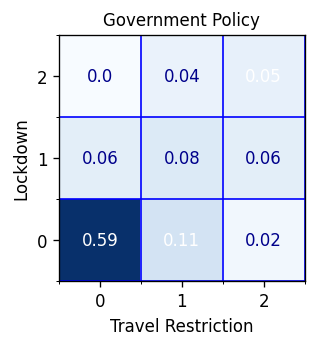

In [ ]:
govr_actions_tuple = np.array(govr_actions_tuple)
print(np.unique(govr_actions_tuple))
govr_actions_lock = govr_actions_tuple[:,0]
govr_actions_travel = govr_actions_tuple[:,1]

hist, x_edges, y_edges = np.histogram2d(govr_actions_lock, govr_actions_travel, bins=3)

hist = np.round(hist/np.sum(hist),2)

x_edges = np.arange(-0.5,3)
y_edges = np.arange(-0.5,3)

f, (ax1) = plt.subplots(1, 1, figsize=(3,3), dpi = 120)
ax1.imshow(np.flipud(hist), cmap="Blues",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])

# Major ticks
ax1.set_xticks(np.arange(0, 3, 1));
ax1.set_yticks(np.arange(0, 3, 1));

# Labels for major ticks
ax1.set_xticklabels(np.arange(0, 3, 1));
ax1.set_yticklabels(np.arange(0, 3, 1));

# Minor ticks
ax1.set_xticks(np.arange(-.5, 3, 1), minor=True);
ax1.set_yticks(np.arange(-.5, 3, 1), minor=True);

# Gridlines based on minor ticks
ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)

for i in range(3):
    for j in range(3):
        if i == 0 and j == 0 :
          text = ax1.text(j, i, hist[i,j], ha="center", va="center", color="w", fontsize=10)
        elif i == 0 and j == 1 :
          text = ax1.text(j, i, hist[i,j], ha="center", va="center", color="w", fontsize=10)
        elif i == 2 and j == 2 :
          text = ax1.text(j, i, hist[i,j], ha="center", va="center", color="w", fontsize=10)
        else :
          text = ax1.text(j, i, hist[i,j], ha="center", va="center", color="darkblue", fontsize=10)
      
im1 = ax1.pcolormesh(x_edges, y_edges, hist, cmap='Blues')
#f.colorbar(im1, ax=ax1, label = "Action Counts")

ax1.set_ylabel('Lockdown', fontsize=10)
ax1.set_xlabel('Travel Restriction', fontsize=10)
ax1.set_title("Government Policy", fontsize=10)
plt.tight_layout()

[0 1 2]
(462, 2)


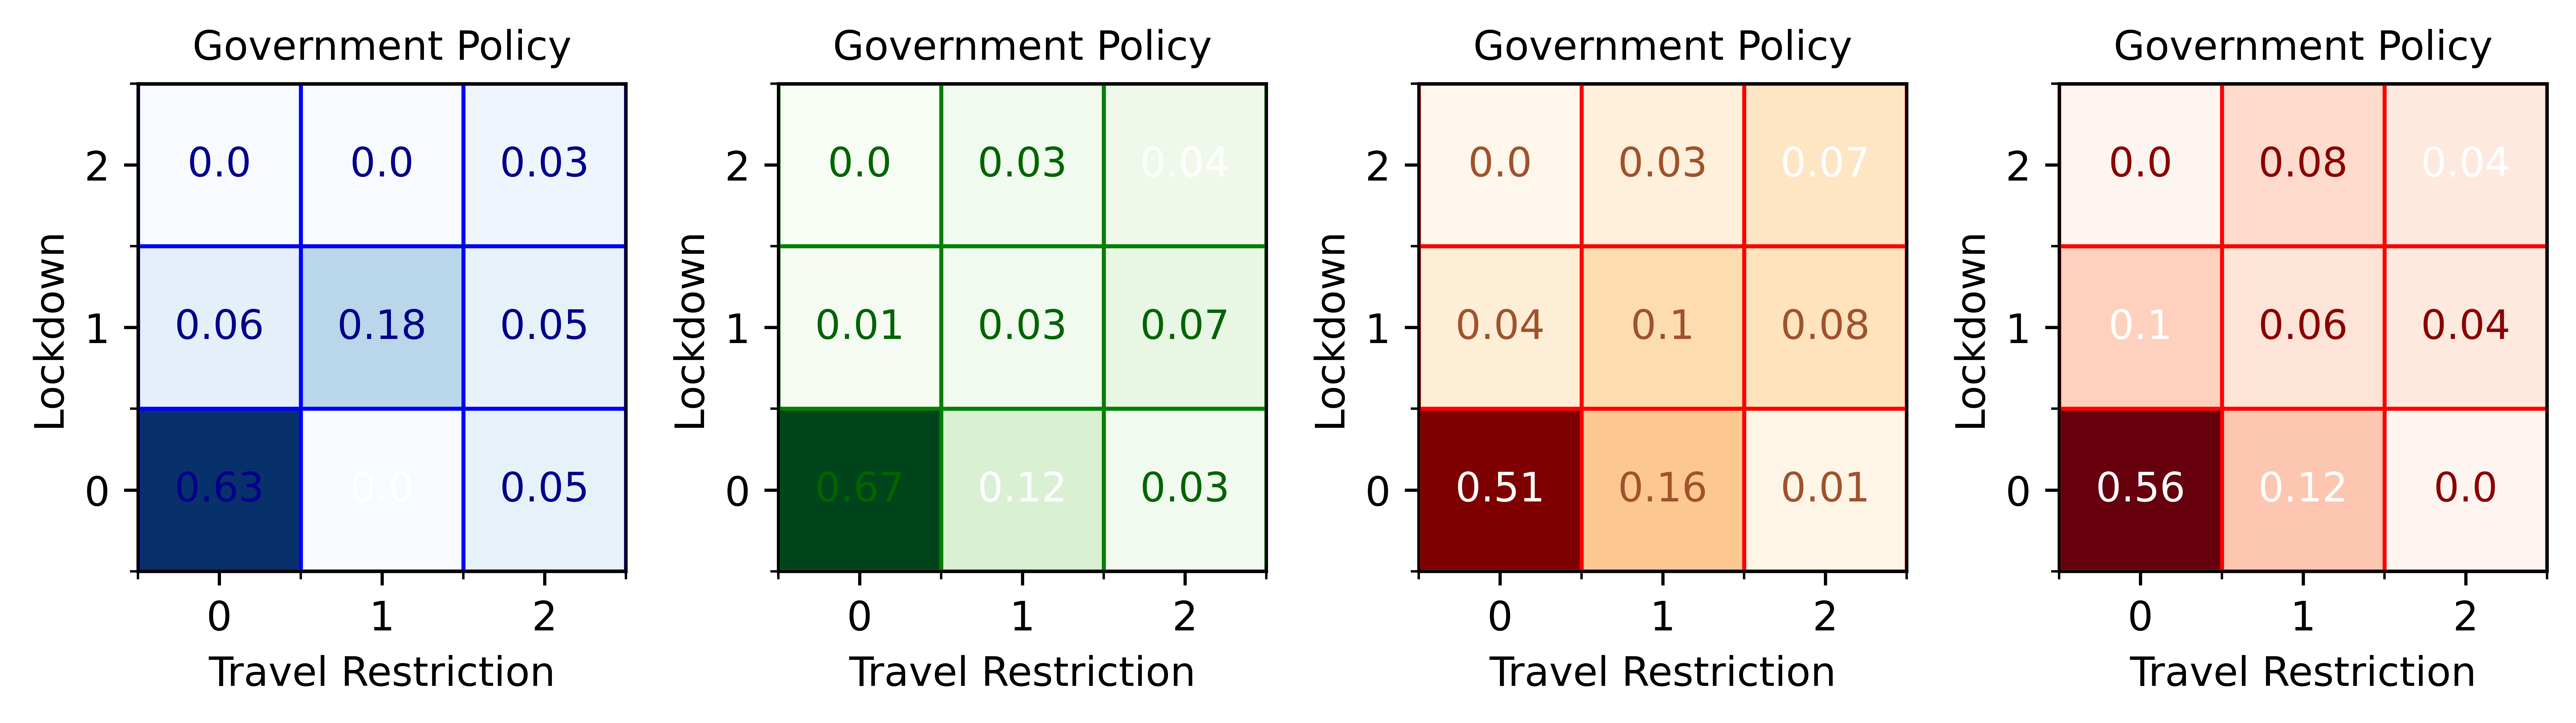

In [ ]:
govr_actions_tuple = np.array(govr_actions_tuple)
print(np.unique(govr_actions_tuple))

pd.concat([pd.DataFrame(govr_actions_tuple),df_test.sign4], axis =1).shape
govr_actions_tuple2 = pd.concat([pd.DataFrame(govr_actions_tuple),df_test.sign4], axis =1)
govr_actions_tuple2_0 = np.array(govr_actions_tuple2[govr_actions_tuple2.sign4 == 0][[0,1]])
govr_actions_tuple2_1 = np.array(govr_actions_tuple2[govr_actions_tuple2.sign4 == 1][[0,1]])
govr_actions_tuple2_2 = np.array(govr_actions_tuple2[govr_actions_tuple2.sign4 == 2][[0,1]])
govr_actions_tuple2_3 = np.array(govr_actions_tuple2[govr_actions_tuple2.sign4 == 3][[0,1]])

govr_actions_lock_0 = govr_actions_tuple2_0[:,0]
govr_actions_travel_0 = govr_actions_tuple2_0[:,1]
govr_actions_lock_1 = govr_actions_tuple2_1[:,0]
govr_actions_travel_1 = govr_actions_tuple2_1[:,1]
govr_actions_lock_2 = govr_actions_tuple2_2[:,0]
govr_actions_travel_2 = govr_actions_tuple2_2[:,1]
govr_actions_lock_3 = govr_actions_tuple2_3[:,0]
govr_actions_travel_3 = govr_actions_tuple2_3[:,1]

hist_0, x_edges, y_edges = np.histogram2d(govr_actions_lock_0, govr_actions_travel_0, bins=3)
hist_1, _, _ = np.histogram2d(govr_actions_lock_1, govr_actions_travel_1, bins=3)
hist_2, _, _ = np.histogram2d(govr_actions_lock_2, govr_actions_travel_2, bins=3)
hist_3, _, _ = np.histogram2d(govr_actions_lock_3, govr_actions_trvael_3, bins=3)

hist_0 = np.round(hist_0/np.sum(hist_0),2)
hist_1 = np.round(hist_1/np.sum(hist_1),2)
hist_2 = np.round(hist_2/np.sum(hist_2),2)
hist_3 = np.round(hist_3/np.sum(hist_3),2)

x_edges = np.arange(-0.5,3)
y_edges = np.arange(-0.5,3)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(9,3), dpi = 1200)
ax1.imshow(np.flipud(hist_0), cmap="Blues",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax2.imshow(np.flipud(hist_1), cmap="Greens",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax3.imshow(np.flipud(hist_2), cmap="Oranges",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax4.imshow(np.flipud(hist_3), cmap="Reds",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])

# Major ticks
ax1.set_xticks(np.arange(0, 3, 1));
ax1.set_yticks(np.arange(0, 3, 1));
ax2.set_xticks(np.arange(0, 3, 1));
ax2.set_yticks(np.arange(0, 3, 1));
ax3.set_xticks(np.arange(0, 3, 1));
ax3.set_yticks(np.arange(0, 3, 1));
ax4.set_xticks(np.arange(0, 3, 1));
ax4.set_yticks(np.arange(0, 3, 1));

# Labels for major ticks
ax1.set_xticklabels(np.arange(0, 3, 1));
ax1.set_yticklabels(np.arange(0, 3, 1));
ax2.set_xticklabels(np.arange(0, 3, 1));
ax2.set_yticklabels(np.arange(0, 3, 1));
ax3.set_xticklabels(np.arange(0, 3, 1));
ax3.set_yticklabels(np.arange(0, 3, 1));
ax4.set_xticklabels(np.arange(0, 3, 1));
ax4.set_yticklabels(np.arange(0, 3, 1));

# Minor ticks
ax1.set_xticks(np.arange(-.5, 3, 1), minor=True);
ax1.set_yticks(np.arange(-.5, 3, 1), minor=True);
ax2.set_xticks(np.arange(-.5, 3, 1), minor=True);
ax2.set_yticks(np.arange(-.5, 3, 1), minor=True);
ax3.set_xticks(np.arange(-.5, 3, 1), minor=True);
ax3.set_yticks(np.arange(-.5, 3, 1), minor=True);
ax4.set_xticks(np.arange(-.5, 3, 1), minor=True);
ax4.set_yticks(np.arange(-.5, 3, 1), minor=True);

# Gridlines based on minor ticks
ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)
ax2.grid(which='minor', color='g', linestyle='-', linewidth=1)
ax3.grid(which='minor', color='r', linestyle='-', linewidth=1)
ax4.grid(which='minor', color='r', linestyle='-', linewidth=1)

print(govr_actions_tuple2_0.shape)
for i in range(3):
    for j in range(3):
        if i == 0 and j == 0 :
          text = ax1.text(j, i, hist_0[i,j], ha="center", va="center", color="darkblue", fontsize=10)
          text = ax2.text(j, i, hist_1[i,j], ha="center", va="center", color="darkgreen", fontsize=10)
          text = ax3.text(j, i, hist_2[i,j], ha="center", va="center", color="w", fontsize=10)
          text = ax4.text(j, i, hist_3[i,j], ha="center", va="center", color="w", fontsize=10)
        elif i == 0 and j == 1 :
          text = ax1.text(j, i, hist_0[i,j], ha="center", va="center", color="w", fontsize=10)
          text = ax2.text(j, i, hist_1[i,j], ha="center", va="center", color="w", fontsize=10)
          text = ax3.text(j, i, hist_2[i,j], ha="center", va="center", color="sienna", fontsize=10)
          text = ax4.text(j, i, hist_3[i,j], ha="center", va="center", color="w", fontsize=10)
        elif i == 1 and j == 0 :
          text = ax1.text(j, i, hist_0[i,j], ha="center", va="center", color="darkblue", fontsize=10)
          text = ax2.text(j, i, hist_1[i,j], ha="center", va="center", color="darkgreen", fontsize=10)
          text = ax3.text(j, i, hist_2[i,j], ha="center", va="center", color="sienna", fontsize=10)
          text = ax4.text(j, i, hist_3[i,j], ha="center", va="center", color="w", fontsize=10)
        elif i == 2 and j == 2 :
          text = ax1.text(j, i, hist_0[i,j], ha="center", va="center", color="darkblue", fontsize=10)
          text = ax2.text(j, i, hist_1[i,j], ha="center", va="center", color="w", fontsize=10)
          text = ax3.text(j, i, hist_2[i,j], ha="center", va="center", color="w", fontsize=10)
          text = ax4.text(j, i, hist_3[i,j], ha="center", va="center", color="w", fontsize=10)
        else :
          text = ax1.text(j, i, hist_0[i,j], ha="center", va="center", color="darkblue", fontsize=10)
          text = ax2.text(j, i, hist_1[i,j], ha="center", va="center", color="darkgreen", fontsize=10)
          text = ax3.text(j, i, hist_2[i,j], ha="center", va="center", color="sienna", fontsize=10)
          text = ax4.text(j, i, hist_3[i,j], ha="center", va="center", color="darkred", fontsize=10)
        

im1 = ax1.pcolormesh(x_edges, y_edges, hist_0, cmap='Blues')
im2 = ax2.pcolormesh(x_edges, y_edges, hist_1, cmap='Greens')
im3 = ax3.pcolormesh(x_edges, y_edges, hist_2, cmap='OrRd')
im4 = ax4.pcolormesh(x_edges, y_edges, hist_3, cmap='Reds')

ax1.set_ylabel('Lockdown', fontsize=10)
ax1.set_xlabel('Travel Restriction', fontsize=10)
ax1.set_title("Government Policy", fontsize=10)
ax2.set_ylabel('Lockdown', fontsize=10)
ax2.set_xlabel('Travel Restriction', fontsize=10)
ax2.set_title("Government Policy", fontsize=10)
ax3.set_ylabel('Lockdown', fontsize=10)
ax3.set_xlabel('Travel Restriction', fontsize=10)
ax3.set_title("Government Policy", fontsize=10)
ax4.set_ylabel('Lockdown', fontsize=10)
ax4.set_xlabel('Travel Restriction', fontsize=10)
ax4.set_title("Government Policy", fontsize=10)
plt.tight_layout()


In [ ]:
len(df_place['Country/Region'].unique()), len(df_place['Region'].unique())

(208, 257)

In [ ]:
df_place.head(2)

,Country/Region,Province/State,Territories,Region,Lat,Long
0,Afghanistan,NaN,NaN,Afghanistan nan,33.0000,65.0000
1,Albania,NaN,NaN,Albania nan,41.1533,20.1683


In [ ]:
#df_place['Country/Region'].unique()

In [ ]:
hist_0, hist_1, hist_2, hist_3

(array([[0.67, 0.16, 0.  ],
        [0.02, 0.07, 0.05],
        [0.01, 0.  , 0.02]]), array([[0.7 , 0.07, 0.02],
        [0.02, 0.05, 0.02],
        [0.01, 0.05, 0.07]]), array([[0.48, 0.25, 0.  ],
        [0.01, 0.05, 0.07],
        [0.  , 0.06, 0.07]]), array([[0.66, 0.07, 0.  ],
        [0.03, 0.05, 0.03],
        [0.05, 0.03, 0.09]]))

In [ ]:
agent_actions_tuple = np.array(agent_actions_tuple)
print(np.unique(agent_actions_tuple))

pd.concat([pd.DataFrame(agent_actions_tuple),df_test.sign4], axis =1).shape
govr_actions_tuple2 = pd.concat([pd.DataFrame(agent_actions_tuple),df_test.sign4], axis =1)
govr_actions_tuple2_0 = np.array(govr_actions_tuple2[govr_actions_tuple2.sign4 == 0][[0,1]])
govr_actions_tuple2_1 = np.array(govr_actions_tuple2[govr_actions_tuple2.sign4 == 1][[0,1]])
govr_actions_tuple2_2 = np.array(govr_actions_tuple2[govr_actions_tuple2.sign4 == 2][[0,1]])
govr_actions_tuple2_3 = np.array(govr_actions_tuple2[govr_actions_tuple2.sign4 == 3][[0,1]])

govr_actions_lock_0 = govr_actions_tuple2_0[:,0]
govr_actions_travel_0 = govr_actions_tuple2_0[:,1]
govr_actions_lock_1 = govr_actions_tuple2_1[:,0]
govr_actions_travel_1 = govr_actions_tuple2_1[:,1]
govr_actions_lock_2 = govr_actions_tuple2_2[:,0]
govr_actions_travel_2 = govr_actions_tuple2_2[:,1]
govr_actions_lock_3 = govr_actions_tuple2_3[:,0]
govr_actions_travel_3 = govr_actions_tuple2_3[:,1]

hist_0, x_edges, y_edges = np.histogram2d(govr_actions_lock_0, govr_actions_travel_0, bins=3)
hist_1, _, _ = np.histogram2d(govr_actions_lock_1, govr_actions_travel_1, bins=3)
hist_2, _, _ = np.histogram2d(govr_actions_lock_2, govr_actions_travel_2, bins=3)
hist_3, _, _ = np.histogram2d(govr_actions_lock_3, govr_actions_travel_3, bins=3)


hist_0 = np.round(hist_0/np.sum(hist_0),2)
hist_1 = np.round(hist_1/np.sum(hist_1),2)
hist_2 = np.round(hist_2/np.sum(hist_2),2)
hist_3 = np.round(hist_3/np.sum(hist_3),2)


x_edges = np.arange(-0.5,3)
y_edges = np.arange(-0.5,3)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(9,3), dpi = 1200)
ax1.imshow(np.flipud(hist_0), cmap="Blues",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax2.imshow(np.flipud(hist_1), cmap="Greens",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax3.imshow(np.flipud(hist_2), cmap="Oranges",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax4.imshow(np.flipud(hist_3), cmap="Reds",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])

# Major ticks
ax1.set_xticks(np.arange(0, 3, 1));
ax1.set_yticks(np.arange(0, 3, 1));
ax2.set_xticks(np.arange(0, 3, 1));
ax2.set_yticks(np.arange(0, 3, 1));
ax3.set_xticks(np.arange(0, 3, 1));
ax3.set_yticks(np.arange(0, 3, 1));
ax4.set_xticks(np.arange(0, 3, 1));
ax4.set_yticks(np.arange(0, 3, 1));

# Labels for major ticks
ax1.set_xticklabels(np.arange(0, 3, 1));
ax1.set_yticklabels(np.arange(0, 3, 1));
ax2.set_xticklabels(np.arange(0, 3, 1));
ax2.set_yticklabels(np.arange(0, 3, 1));
ax3.set_xticklabels(np.arange(0, 3, 1));
ax3.set_yticklabels(np.arange(0, 3, 1));
ax4.set_xticklabels(np.arange(0, 3, 1));
ax4.set_yticklabels(np.arange(0, 3, 1));

# Minor ticks
ax1.set_xticks(np.arange(-.5, 3, 1), minor=True);
ax1.set_yticks(np.arange(-.5, 3, 1), minor=True);
ax2.set_xticks(np.arange(-.5, 3, 1), minor=True);
ax2.set_yticks(np.arange(-.5, 3, 1), minor=True);
ax3.set_xticks(np.arange(-.5, 3, 1), minor=True);
ax3.set_yticks(np.arange(-.5, 3, 1), minor=True);
ax4.set_xticks(np.arange(-.5, 3, 1), minor=True);
ax4.set_yticks(np.arange(-.5, 3, 1), minor=True);

# Gridlines based on minor ticks
ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)
ax2.grid(which='minor', color='g', linestyle='-', linewidth=1)
ax3.grid(which='minor', color='r', linestyle='-', linewidth=1)
ax4.grid(which='minor', color='r', linestyle='-', linewidth=1)

print(govr_actions_tuple2_0.shape)
for i in range(3):
    for j in range(3):
#        text = ax1.text(j, i, hist_0[i,j], ha="center", va="center", color="w", fontsize=7)
        if i == 0 and j == 0 :
          text = ax1.text(j, i, hist_0[i,j], ha="center", va="center", color="darkblue", fontsize=10)
          text = ax2.text(j, i, hist_1[i,j], ha="center", va="center", color="darkgreen", fontsize=10)
          text = ax3.text(j, i, hist_2[i,j], ha="center", va="center", color="w", fontsize=10)
          text = ax4.text(j, i, hist_3[i,j], ha="center", va="center", color="w", fontsize=10)

        elif i == 0 and j == 1 :
          text = ax1.text(j, i, hist_0[i,j], ha="center", va="center", color="w", fontsize=10)
          text = ax2.text(j, i, hist_1[i,j], ha="center", va="center", color="w", fontsize=10)
          text = ax3.text(j, i, hist_2[i,j], ha="center", va="center", color="sienna", fontsize=10)
          text = ax4.text(j, i, hist_3[i,j], ha="center", va="center", color="w", fontsize=10)
        elif i == 1 and j == 1 :
          text = ax1.text(j, i, hist_0[i,j], ha="center", va="center", color="darkblue", fontsize=10)
          text = ax2.text(j, i, hist_1[i,j], ha="center", va="center", color="darkgreen", fontsize=10)
          text = ax3.text(j, i, hist_2[i,j], ha="center", va="center", color="w", fontsize=10)
          text = ax4.text(j, i, hist_3[i,j], ha="center", va="center", color="w", fontsize=10)
        elif i == 0 and j == 2 :
          text = ax1.text(j, i, hist_0[i,j], ha="center", va="center", color="darkblue", fontsize=10)
          text = ax2.text(j, i, hist_1[i,j], ha="center", va="center", color="w", fontsize=10)
          text = ax3.text(j, i, hist_2[i,j], ha="center", va="center", color="sienna", fontsize=10)
          text = ax4.text(j, i, hist_3[i,j], ha="center", va="center", color="darkred", fontsize=10)
        elif i == 2 and j == 1 :
          text = ax1.text(j, i, hist_0[i,j], ha="center", va="center", color="w", fontsize=10)
          text = ax2.text(j, i, hist_1[i,j], ha="center", va="center", color="darkgreen", fontsize=10)
          text = ax3.text(j, i, hist_2[i,j], ha="center", va="center", color="sienna", fontsize=10)
          text = ax4.text(j, i, hist_3[i,j], ha="center", va="center", color="darkred", fontsize=10)
        elif i == 2 and j == 2 :
          text = ax1.text(j, i, hist_0[i,j], ha="center", va="center", color="darkblue", fontsize=10)
          text = ax2.text(j, i, hist_1[i,j], ha="center", va="center", color="darkgreen", fontsize=10)
          text = ax3.text(j, i, hist_2[i,j], ha="center", va="center", color="w", fontsize=10)
          text = ax4.text(j, i, hist_3[i,j], ha="center", va="center", color="w", fontsize=10)
        else :
          text = ax1.text(j, i, hist_0[i,j], ha="center", va="center", color="darkblue", fontsize=10)
          text = ax2.text(j, i, hist_1[i,j], ha="center", va="center", color="darkgreen", fontsize=10)
          text = ax3.text(j, i, hist_2[i,j], ha="center", va="center", color="sienna", fontsize=10)
          text = ax4.text(j, i, hist_3[i,j], ha="center", va="center", color="darkred", fontsize=10)
        

im1 = ax1.pcolormesh(x_edges, y_edges, hist_0, cmap='Blues')
#f.colorbar(im1, ax=ax1, label = "Action Counts")

im2 = ax2.pcolormesh(x_edges, y_edges, hist_1, cmap='Greens')
#f.colorbar(im2, ax=ax2, label = "Action Counts")

im3 = ax3.pcolormesh(x_edges, y_edges, hist_2, cmap='YlOrBr')
#f.colorbar(im3, ax=ax3, label = "Action Counts")

im4 = ax4.pcolormesh(x_edges, y_edges, hist_3, cmap='Reds')
#f.colorbar(im4, ax=ax4, label = "Action Counts")

#ax1.set_xlabel('Travel Restriction', fontsize=7)
ax1.set_ylabel('Lockdown', fontsize=10)
ax1.set_xlabel('Travel Restriction', fontsize=10)
ax1.set_title("Agent Policy", fontsize=10)
ax2.set_ylabel('Lockdown', fontsize=10)
ax2.set_xlabel('Travel Restriction', fontsize=10)
ax2.set_title("Agent Policy", fontsize=10)
ax3.set_ylabel('Lockdown', fontsize=10)
ax3.set_xlabel('Travel Restriction', fontsize=10)
ax3.set_title("Agent Policy", fontsize=10)
ax4.set_ylabel('Lockdown', fontsize=10)
ax4.set_xlabel('Travel Restriction', fontsize=10)
ax4.set_title("Agent Policy", fontsize=10)
plt.tight_layout()


In [ ]:
test_result_3.head()

,Country/Region,date,first date,confirmed,recovered,deaths,lockdown_d3,travel_d3,Lat,Long,PM,PD,PP,GDP,TP1,confirmed_outof_pp,recovered_outof_pp,deaths_outof_pp,deaths_outof_confirmed,recovered_outof_confirmed,sign4,acc_death,acc_recovery,acc_confirmed,reward,PL,PT,AL,AT
0,Algeria,17/02/2020,17/02/2020,0.0,0.0,0.0,0,0,0.646382,0.379754,0.030027,0.00069,0.032834,0.122001,0.0,0.0,0.0,0.0,0.0,0.0,2,0.076923,0.001083,0.000124,1.000000e-09,0,0,1,2
1,Algeria,18/02/2020,17/02/2020,0.0,0.0,0.0,0,0,0.646382,0.379754,0.030027,0.00069,0.032834,0.122001,0.0,0.0,0.0,0.0,0.0,0.0,2,0.076923,0.001083,0.000124,1.000000e-09,0,0,1,2
2,Algeria,19/02/2020,17/02/2020,0.0,0.0,0.0,0,0,0.646382,0.379754,0.030027,0.00069,0.032834,0.122001,0.0,0.0,0.0,0.0,0.0,0.0,2,0.076923,0.001083,0.000124,1.000000e-09,0,0,1,2
3,Algeria,20/02/2020,17/02/2020,0.0,0.0,0.0,0,0,0.646382,0.379754,0.030027,0.00069,0.032834,0.122001,0.0,0.0,0.0,0.0,0.0,0.0,2,0.076923,0.001083,0.000124,1.000000e-09,0,0,1,2
4,Algeria,21/02/2020,17/02/2020,0.0,0.0,0.0,0,0,0.646382,0.379754,0.030027,0.00069,0.032834,0.122001,0.0,0.0,0.0,0.0,0.0,0.0,2,0.076923,0.001083,0.000124,1.000000e-09,0,0,1,2


In [ ]:
test_result_3_upload = pd.read_csv('/content/gdrive/My Drive/test_result_3.csv')

In [ ]:
agent_actions_tuple_upload = test_result_3_upload[['agent_lockdown_d3', 'agent_travel_d3', 'sign4']]
agent_actions_tuple_upload.columns = ['AL', 'AT', 'sign4']
govr_actions_tuple_upload = test_result_3_upload[['lockdown_d3', 'travel_d3', 'sign4']]
govr_actions_tuple_upload.columns = ['PL', 'PT', 'sign4']

In [ ]:
hist_0, hist_1, hist_2, hist_3

NameError: ignored

In [ ]:
test_result_3_upload.head(2)

,Country/Region,date,first date,confirmed,recovered,deaths,lockdown_d3,travel_d3,Lat,Long,PM,PD,PP,GDP,TP1,confirmed_outof_pp,recovered_outof_pp,deaths_outof_pp,deaths_outof_confirmed,recovered_outof_confirmed,sign4,acc_death,acc_recovery,acc_confirmed,reward,PL,PT,AL,AT
0,Algeria,17/02/2020,17/02/2020,0.0,0.0,0.0,0,0,0.646382,0.379754,0.030027,0.00069,0.032834,0.122001,0.0,0.0,0.0,0.0,0.0,0.0,2,0.076923,0.001083,0.000124,1.000000e-09,0,0,1,2
1,Algeria,18/02/2020,17/02/2020,0.0,0.0,0.0,0,0,0.646382,0.379754,0.030027,0.00069,0.032834,0.122001,0.0,0.0,0.0,0.0,0.0,0.0,2,0.076923,0.001083,0.000124,1.000000e-09,0,0,1,2


In [ ]:
#test_result_3[test_result_3.duplicated() == True]
#test_result_3 = test_result_3.reset_index(drop = True)
#test_result_3_upload2.head(2)
import pandas as pd
test_result_3 = pd.read_csv('result.csv')
test_result_3.columns

Index(['Country/Region', 'date', 'confirmed', 'recovered', 'deaths',
       'lockdown_d3', 'travel_d3', 'Lat', 'Long', 'PM', 'PD', 'PP', 'GDP',
       'TP1', 'confirmed_outof_pp', 'recovered_outof_pp', 'deaths_outof_pp',
       'deaths_outof_confirmed', 'recovered_outof_confirmed', 'sign4',
       'acc_death', 'acc_recovery', 'acc_confirmed', 'reward', '0', '1', '0.1',
       '1.1'],
      dtype='object')

In [ ]:
test_result_3.columns = ['Country/Region', 'date', 'confirmed', 'recovered', 'deaths',
       'lockdown_d3', 'travel_d3', 'Lat', 'Long', 'PM', 'PD', 'PP', 'GDP', 'LifeExpectancy',
       'TP1', 'confirmed_outof_pp', 'recovered_outof_pp', 'deaths_outof_pp',
       'deaths_outof_confirmed', 'recovered_outof_confirmed', 'sign4',
       'acc_death', 'acc_recovery', 'acc_confirmed', 'reward', 'PL', 'PT', 'AL', 'AT']
       

In [ ]:
test_result_3.columns = ['Country/Region', 'date', 'confirmed', 'recovered', 'deaths',
       'lockdown_d3', 'travel_d3', 'Lat', 'Long', 'PM', 'PD', 'PP', 'GDP', 'LifeExpectancy'
       'TP1', 'confirmed_outof_pp', 'recovered_outof_pp', 'deaths_outof_pp',
       'deaths_outof_confirmed', 'recovered_outof_confirmed', 'sign4',
       'acc_death', 'acc_recovery', 'acc_confirmed', 'reward', 'PL', 'PT', 'agent_lockdown_d3', 'agent_travel_d3']
       

In [ ]:
test_result_3_upload = test_result_3[~((test_result_3.confirmed == 0) & (test_result_3.lockdown_d3 == 0) & (test_result_3.travel_d3 == 0))]

In [ ]:
test_result_3_upload.head()
test_result_3_upload2 = test_result_3_upload2.drop_duplicates()
test_result_3_upload2.columns

NameError: ignored

In [ ]:
#test_result_3

In [ ]:
test_result_3[test_result_3['Country/Region']=='US']


,Country/Region,date,confirmed,recovered,deaths,lockdown_d3,travel_d3,Lat,Long,PM,PD,PP,GDP,TP1,confirmed_outof_pp,recovered_outof_pp,deaths_outof_pp,deaths_outof_confirmed,recovered_outof_confirmed,sign4,acc_death,acc_recovery,acc_confirmed,reward,PL,PT,agent_lockdown_d3,agent_travel_d3
2772,US,2020-01-22,0.000003,0.000000,0.000000,0,0,0.71971,0.037389,0.229508,0.001375,0.254086,0.494841,0.000025,2.050232e-07,0.000000,0.000000,0.003116,0.000149,3,0.076923,0.001083,0.000124,1.000000e-09,0,0,0,0
2773,US,2020-01-23,0.000003,0.000000,0.000000,0,0,0.71971,0.037389,0.229508,0.001375,0.254086,0.494841,0.000092,2.050232e-07,0.000000,0.000000,0.003116,0.000149,3,0.076923,0.001083,0.000124,-1.000000e+02,0,0,0,0
2774,US,2020-01-24,0.000005,0.000000,0.000000,0,0,0.71971,0.037389,0.229508,0.001375,0.254086,0.494841,0.000135,4.100464e-07,0.000000,0.000000,0.003116,0.000149,3,0.076923,0.001083,0.000247,1.000000e+02,0,0,0,0
2775,US,2020-01-25,0.000005,0.000000,0.000000,0,0,0.71971,0.037389,0.229508,0.001375,0.254086,0.494841,0.000257,4.100464e-07,0.000000,0.000000,0.003116,0.000149,3,0.076923,0.001083,0.000124,-1.000000e+02,0,0,0,0
2776,US,2020-01-26,0.000013,0.000000,0.000000,0,0,0.71971,0.037389,0.229508,0.001375,0.254086,0.494841,0.000201,1.025116e-06,0.000000,0.000000,0.003116,0.000149,3,0.076923,0.001083,0.000309,1.000000e+02,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,US,2020-04-03,0.695533,0.125764,0.413791,2,1,0.71971,0.037389,0.229508,0.001375,0.254086,0.494841,0.330082,5.650153e-02,0.007562,0.012676,0.003196,0.000155,3,0.097017,0.001170,0.000140,2.997893e+02,2,1,2,0
2879,US,2020-04-04,0.779493,0.189832,0.490862,2,1,0.71971,0.037389,0.229508,0.001375,0.254086,0.494841,0.574807,6.332203e-02,0.011414,0.015037,0.003201,0.000156,3,0.096026,0.001652,0.000139,1.001803e+02,2,1,2,0
2880,US,2020-04-05,0.850713,0.226057,0.561628,2,1,0.71971,0.037389,0.229508,0.001375,0.254086,0.494841,0.351498,6.910758e-02,0.013592,0.017205,0.003205,0.000157,3,0.091709,0.001296,0.000135,1.000459e+02,2,1,2,0
2881,US,2020-04-06,0.925406,0.253692,0.629591,2,1,0.71971,0.037389,0.229508,0.001375,0.254086,0.494841,0.373191,7.517525e-02,0.015254,0.019287,0.003208,0.000157,3,0.089334,0.001219,0.000135,-1.000240e+02,2,1,2,0


In [ ]:
#test_result_3 = test_result_3.drop_duplicates()
govr_ = test_result_3[(test_result_3['lockdown_d3'] == 1) | (test_result_3['travel_d3'] == 1)].groupby('Country/Region').first().reset_index()
agents_ = test_result_3[(test_result_3['agent_lockdown_d3'] == 1) | (test_result_3['agent_travel_d3'] == 1)].groupby('Country/Region').first().reset_index()

(govr_agents_result['agents_date']).unique()

In [ ]:
govr_[['Country/Region', 'sign4','date']].head(2)

,Country/Region,sign4,date
0,Aruba,0,2020-03-15
1,Benin,1,2020-03-19


In [ ]:
govr_agents_result = govr_[['Country/Region', 'sign4','date']].merge(agents_[['Country/Region', 'date']], left_on = 'Country/Region', right_on = 'Country/Region')

govr_agents_result.columns = ['Country/Region', 'sign4','govr_date','agents_date']
govr_agents_result['agents_date'] = pd.to_datetime(govr_agents_result['agents_date'], format='%Y-%m-%d')
govr_agents_result['govr_date'] = pd.to_datetime(govr_agents_result['govr_date'], format='%Y-%m-%d')

govr_agents_result['time_diff'] = (govr_agents_result['agents_date'] - govr_agents_result['govr_date']).dt.days

In [ ]:
govr_agents_result.sign4.value_counts()

3    8
1    8
2    6
0    4
Name: sign4, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


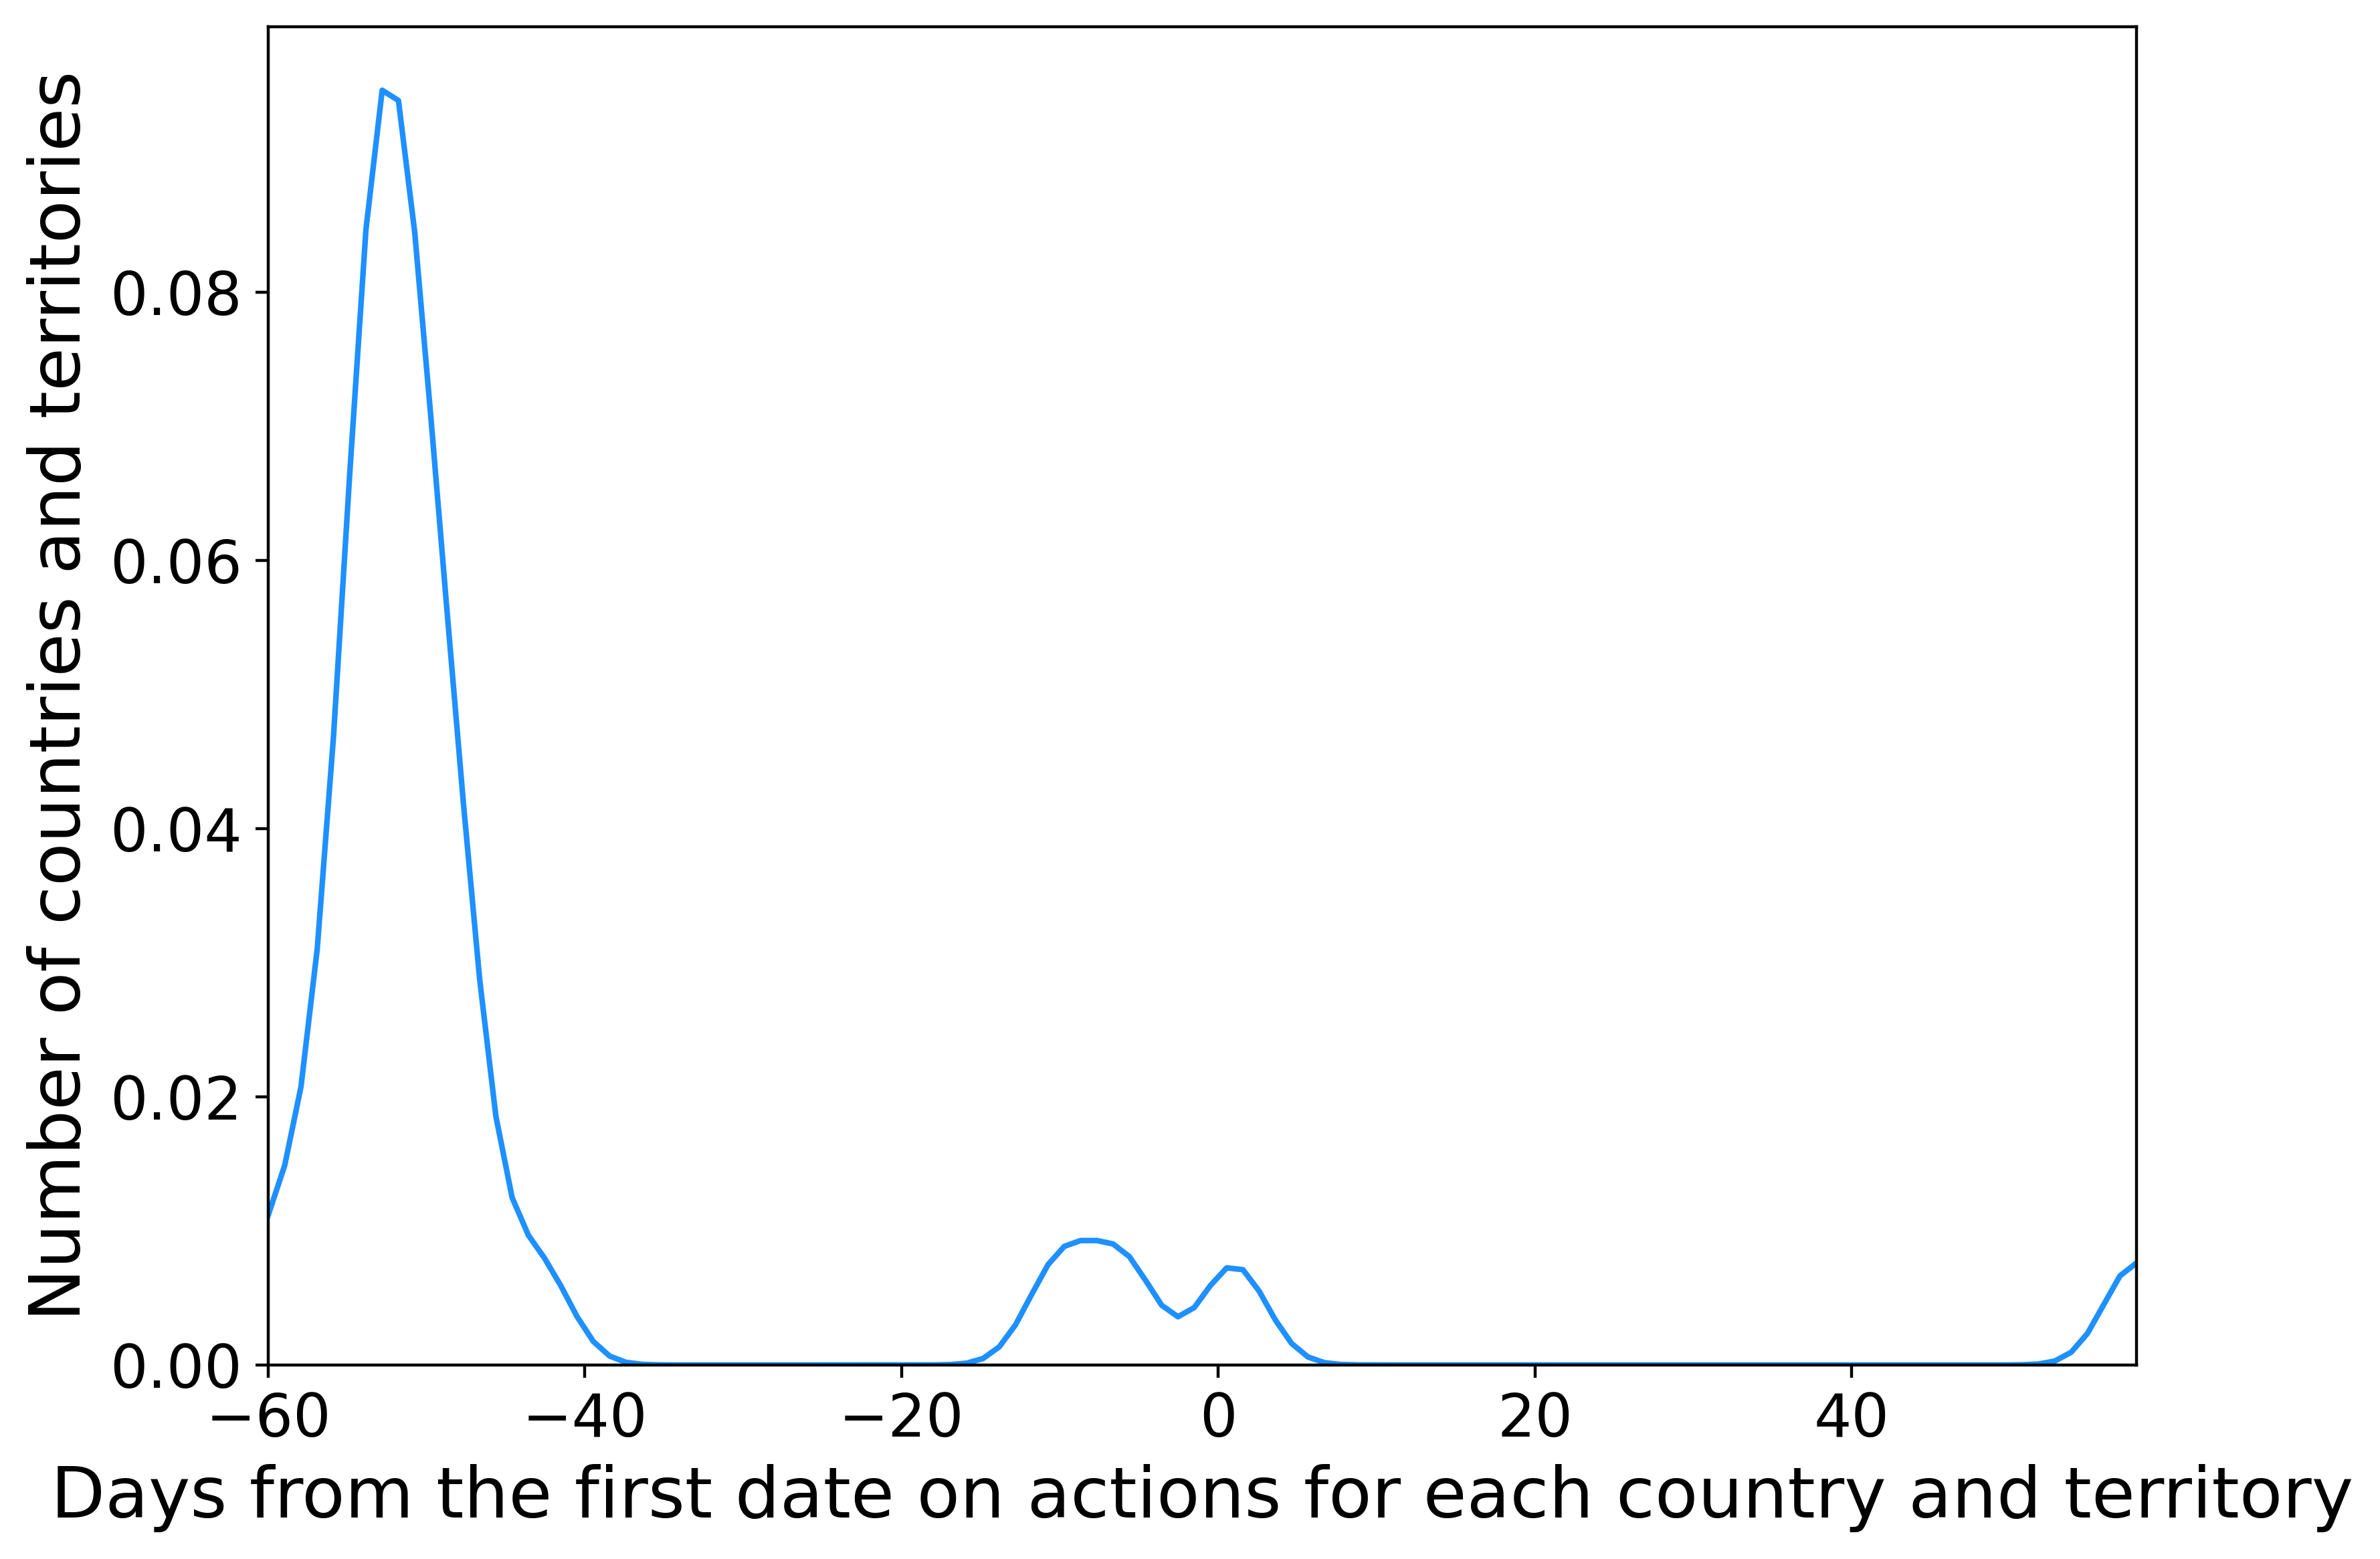

In [ ]:
# Timing for Country level
import matplotlib.pyplot as plt
import seaborn as sns
#text = 'LW2'
texts = ['time_diff']
bf = 19; sf = 16
for text in texts : 
  x1 = list(govr_agents_result[text])
  
  c1 = 0; c2: 0
  kwargs = dict(hist_kws={'alpha':.6}, bins = 50, kde_kws={'linewidth':2})
  plt.figure(figsize=(9,6), dpi = 400)

  sns.kdeplot(x1, color="dodgerblue") 
  plt.xlim(xmin=np.min(govr_agents_result['time_diff']),xmax=np.max(govr_agents_result['time_diff']))
  plt.xticks(fontsize = 16)
  plt.yticks(fontsize = 16)
  plt.xlabel('Days from the first date on actions for each country and territory', fontsize = bf)

  #'Lockdown and Travel Restriction Policy Date from the Arrival Date in each Country (for the full restriction)'
  plt.ylabel('Number of countries and territories', fontsize = bf)
  #plt.title('Side-by-Side Histogram with Multiple Airlines')

  plt.tight_layout()
  plt.savefig('/content/gdrive/My Drive/Timing.png', dpi = 400)


In [ ]:
test_result_3['lockdown_diff'] = test_result_3['agent_lockdown_d3'].astype(int) - test_result_3['lockdown_d3'].astype(int) 
test_result_3['travel_diff'] = test_result_3['agent_travel_d3'].astype(int) - test_result_3['travel_d3'].astype(int) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test_result_32 = test_result_3[~((test_result_3.confirmed == 0)& (test_result_3.lockdown_d3 == 0) & (test_result_3.travel_d3 == 0))]
#test_result_3_diff = test_result_32.groupby('Country/Region')[['lockdown_diff', 'travel_diff', 'sign4']].mean().reset_index()

In [ ]:
test_result_3_diff = np.round(test_result_32.groupby('Country/Region')[['lockdown_diff', 'travel_diff', 'sign4']].mean().reset_index())
test_result_3_diff1 = test_result_3[['Country/Region', 'lockdown_d3', 'travel_d3']]
test_result_3_diff1[['lockdown_d3', 'travel_d3']] = test_result_3_diff1[['lockdown_d3', 'travel_d3']].astype(int)

test_result_3_diff1 = np.round(test_result_3_diff1.groupby('Country/Region')[['lockdown_d3', 'travel_d3']].mean().reset_index())

test_result_3_diff2 = test_result_3_diff.merge(test_result_3_diff1, left_on='Country/Region', right_on='Country/Region')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
test_result_3_diff = test_result_32.groupby('Country/Region')[['lockdown_diff', 'travel_diff', 'sign4']].mean().reset_index()
test_result_3_diff1 = test_result_3[['Country/Region', 'lockdown_d3', 'travel_d3']]
test_result_3_diff1[['lockdown_d3', 'travel_d3']] = test_result_3_diff1[['lockdown_d3', 'travel_d3']].astype(int)

test_result_3_diff1 = test_result_3_diff1.groupby('Country/Region')[['lockdown_d3', 'travel_d3']].min().reset_index()

test_result_3_diff2 = test_result_3_diff.merge(test_result_3_diff1, left_on='Country/Region', right_on='Country/Region')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
test_result_3.columns
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#df_unpivoted4[df_unpivoted4.date == '2020-04-07'], how='left', left_on=['Region'], right_on=['Region'])
agent_result1 = pd.DataFrame(test_result_3.groupby(['Country/Region'])['reward'].sum()).reset_index()
agent_result1.columns = ['Country/Region', 'reward_sum']

agent_result3 = pd.DataFrame(test_result_3[test_result_3['confirmed'] > 0].groupby(['Country/Region'])['confirmed'].count()).reset_index()
agent_result3.columns = ['Country/Region', 'cnt_nonzero']

agent_result2 = agent_result1.merge(test_result_3[test_result_3.date == '2020-04-07'][['Country/Region','acc_confirmed','acc_death', 'acc_recovery', 'confirmed_outof_pp','deaths_outof_pp','recovered_outof_pp', 'sign4', 'lockdown_d3', 'travel_d3',
       'PD', 'GDP', 'TP1', 'Lat', 'Long']], how='left', left_on=['Country/Region'], right_on=['Country/Region'])
agent_result2['acc_total'] = agent_result2['acc_confirmed']+agent_result2['acc_death']/2.0-agent_result2['acc_recovery']/2.0

agent_result2 = agent_result2.merge(agent_result3, how='left', left_on=['Country/Region'], right_on=['Country/Region'])
agent_result2['confirmed_outof_pp'] = agent_result2['confirmed_outof_pp']/agent_result2['cnt_nonzero']
agent_result2['deaths_outof_pp'] = agent_result2['deaths_outof_pp']/agent_result2['cnt_nonzero']
agent_result2['recovered_outof_pp'] = agent_result2['recovered_outof_pp']/agent_result2['cnt_nonzero']
agent_result2['acc_confirmed'] = agent_result2['acc_confirmed']/agent_result2['cnt_nonzero']
agent_result2['acc_death'] = agent_result2['acc_death']/agent_result2['cnt_nonzero']
agent_result2['acc_recovery'] = agent_result2['acc_recovery']/agent_result2['cnt_nonzero']
agent_result2['acc_total'] = agent_result2['acc_total']/agent_result2['cnt_nonzero']

agent_result2['lockdown_d3_cut'] = pd.cut(agent_result2["lockdown_d3"], [-0.003, 0, 1.8, 3], labels = [0,1,2]).astype(int)
agent_result2['travel_d3_cut'] = pd.cut(agent_result2["travel_d3"], [-0.003, 0, 1.8, 3], labels = [0,1,2]).astype(int)

agent_result2.head()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Country/Region,reward_sum,acc_confirmed,acc_death,acc_recovery,confirmed_outof_pp,deaths_outof_pp,recovered_outof_pp,sign4,lockdown_d3,travel_d3,PD,GDP,TP1,Lat,Long,acc_total,cnt_nonzero,lockdown_d3_cut,travel_d3_cut
0,Algeria,1699.814419,0.000003,0.002065,0.000032,0.000054,0.000062,0.000016,2,0,0,0.000690,0.122001,0.003736,0.646382,0.379754,0.001019,43,0,0
1,Aruba,497.000000,0.000005,0.002959,0.000300,0.008505,0.000000,0.006114,0,2,2,0.043016,0.163738,0.000188,0.520755,0.127671,0.001334,26,2,2
2,Benin,500.000000,0.000005,0.003344,0.000047,0.000006,0.000002,0.000004,1,0,1,0.004001,0.019108,0.000066,0.494756,0.382061,0.001654,23,0,1
3,Brazil,599.891844,0.000003,0.002360,0.000026,0.000118,0.000050,0.000004,2,2,2,0.000965,0.126845,0.139507,0.304132,0.191348,0.001170,42,2,2
4,Cambodia,799.952830,0.000002,0.001068,0.000017,0.000007,0.000000,0.000013,0,1,2,0.003570,0.034365,0.000293,0.512912,0.742808,0.000528,72,1,2


In [ ]:
test_result_3.head(2)

,Country/Region,date,confirmed,recovered,deaths,lockdown_d3,travel_d3,Lat,Long,PM,PD,PP,GDP,TP1,confirmed_outof_pp,recovered_outof_pp,deaths_outof_pp,deaths_outof_confirmed,recovered_outof_confirmed,sign4,acc_death,acc_recovery,acc_confirmed,reward,PL,PT,agent_lockdown_d3,agent_travel_d3,lockdown_diff,travel_diff
0,Algeria,2020-01-22,0.0,0.0,0.0,0,0,0.646382,0.379754,0.030027,0.00069,0.032834,0.122001,0.0,0.0,0.0,0.0,0.0,0.0,2,0.076923,0.001083,0.000124,1.000000e-09,0,0,1,2,1,2
1,Algeria,2020-01-23,0.0,0.0,0.0,0,0,0.646382,0.379754,0.030027,0.00069,0.032834,0.122001,0.0,0.0,0.0,0.0,0.0,0.0,2,0.076923,0.001083,0.000124,1.000000e-09,0,0,1,2,1,2


In [ ]:
agent_result3 = pd.DataFrame(test_result_3.groupby(['Country/Region'])[['lockdown_diff', 'travel_diff']].mean()).reset_index()
agent_result4 = agent_result2.merge(test_result_3[['Country/Region', 'lockdown_diff', 'travel_diff']], how='left', left_on=['Country/Region'], right_on=['Country/Region'])

agent_result4.head(2)

agent_result4['lockdown_diff_abs'] = abs(agent_result4['lockdown_diff'])
agent_result4['travel_diff_abs'] = abs(agent_result4['travel_diff'])
agent_result4['total_diff'] = agent_result4['travel_diff'] + agent_result4['lockdown_diff']
agent_result4['total_diff_abs'] = abs(agent_result4['travel_diff'] + agent_result4['lockdown_diff'])

In [ ]:
'''
f, (ax1) = plt.subplots(1, 1, figsize=(6,5), dpi = 100)
ax1 = (sns.lineplot(y="reward_sum", x="total_diff", data=agent_result4[agent_result4.sign4 == 0])) #confirmed_outof_pp [agent_result4.sign4 == 2] lockdown_diff
ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)
ax1.set_ylabel('Sum of rewards')
ax1.set_xlabel('total_diff')
#ax1.set_title("Agent policy")
plt.tight_layout()


f, (ax1) = plt.subplots(1, 1, figsize=(6,5), dpi = 100)
ax1 = (sns.lineplot(y="reward_sum", x="total_diff", data=agent_result4[agent_result4.sign4 == 2])) #confirmed_outof_pp [agent_result4.sign4 == 2] lockdown_diff
ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)
ax1.set_ylabel('Sum of rewards')
ax1.set_xlabel('total_diff')
#ax1.set_title("Agent policy")
plt.tight_layout()
'''

'\nf, (ax1) = plt.subplots(1, 1, figsize=(6,5), dpi = 100)\nax1 = (sns.lineplot(y="reward_sum", x="total_diff", data=agent_result4[agent_result4.sign4 == 0])) #confirmed_outof_pp [agent_result4.sign4 == 2] lockdown_diff\nax1.grid(which=\'minor\', color=\'b\', linestyle=\'-\', linewidth=1)\nax1.set_ylabel(\'Sum of rewards\')\nax1.set_xlabel(\'total_diff\')\n#ax1.set_title("Agent policy")\nplt.tight_layout()\n\n\nf, (ax1) = plt.subplots(1, 1, figsize=(6,5), dpi = 100)\nax1 = (sns.lineplot(y="reward_sum", x="total_diff", data=agent_result4[agent_result4.sign4 == 2])) #confirmed_outof_pp [agent_result4.sign4 == 2] lockdown_diff\nax1.grid(which=\'minor\', color=\'b\', linestyle=\'-\', linewidth=1)\nax1.set_ylabel(\'Sum of rewards\')\nax1.set_xlabel(\'total_diff\')\n#ax1.set_title("Agent policy")\nplt.tight_layout()\n'

In [ ]:
agent_result5 = agent_result4
agent_result5['acc_total'] = agent_result5['acc_total']*1000

agent_result6 = agent_result4.merge(govr_agents_result, how='left', left_on=['Country/Region'], right_on=['Country/Region'])

In [ ]:
agent_result4.head(2)

govr_agents_result 

,Country/Region,reward_sum,acc_confirmed,acc_death,acc_recovery,confirmed_outof_pp,deaths_outof_pp,recovered_outof_pp,sign4,lockdown_d3,travel_d3,PD,GDP,TP1,Lat,Long,acc_total,cnt_nonzero,lockdown_d3_cut,travel_d3_cut,lockdown_diff,travel_diff,lockdown_diff_abs,travel_diff_abs,total_diff,total_diff_abs
0,Algeria,1699.814419,0.000003,0.002065,0.000032,0.000054,0.000062,0.000016,2,0,0,0.00069,0.122001,0.003736,0.646382,0.379754,1.019383,43,0,0,1,2,1,2,3,3
1,Algeria,1699.814419,0.000003,0.002065,0.000032,0.000054,0.000062,0.000016,2,0,0,0.00069,0.122001,0.003736,0.646382,0.379754,1.019383,43,0,0,1,2,1,2,3,3


In [ ]:
#If you want to focus on, only after any first action or after at least XX% of population of something,
#you can make the differnce.
df_test_orig.columns
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

agent_result1 = pd.DataFrame(df_test_orig.groupby(['Country/Region'])['reward'].sum()).reset_index()
agent_result1.columns = ['Country/Region', 'reward_sum']
agent_result3 = pd.DataFrame(df_test_orig[df_test_orig['confirmed'] > 0].groupby(['Country/Region'])['confirmed'].count()).reset_index()
agent_result3.columns = ['Country/Region', 'cnt_nonzero']

agent_result2 = agent_result1.merge(df_test_orig[df_test_orig.date == '2020-04-07'][['Country/Region','confirmed_outof_pp','deaths_outof_pp','recovered_outof_pp', 'sign4', 'lockdown_d3', 'travel_d3',
       'PD', 'GDP', 'TP1', 'Lat', 'Long']], how='left', left_on=['Country/Region'], right_on=['Country/Region'])

agent_result2 = agent_result2.merge(agent_result3, how='left', left_on=['Country/Region'], right_on=['Country/Region'])
agent_result2['confirmed_outof_pp'] = agent_result2['confirmed_outof_pp']/agent_result2['cnt_nonzero']
agent_result2['deaths_outof_pp'] = agent_result2['deaths_outof_pp']/agent_result2['cnt_nonzero']
agent_result2['recovered_outof_pp'] = agent_result2['recovered_outof_pp']/agent_result2['cnt_nonzero']

agent_result2['lockdown_d3_cut'] = pd.cut(agent_result2["lockdown_d3"], [-0.003, 0, 1.8, 3], labels = [0,1,2]).astype(int)
agent_result2['travel_d3_cut'] = pd.cut(agent_result2["travel_d3"], [-0.003, 0, 1.8, 3], labels = [0,1,2]).astype(int)

agent_result2.head()

,Country/Region,reward_sum,confirmed_outof_pp,deaths_outof_pp,recovered_outof_pp,sign4,lockdown_d3,travel_d3,PD,GDP,TP1,Lat,Long,cnt_nonzero,lockdown_d3_cut,travel_d3_cut
0,Andorra,-300.0,0.027027,0.027027,7.335542e-03,3,1.0,0.0,0.037917,0.000267,0.017465,0.740687,0.298607,37,1,0
1,Angola,0.0,0.000002,0.000006,8.829843e-07,1,0.0,1.0,0.005892,0.061913,0.000545,0.263729,0.364764,19,0,1
2,Bangladesh,-100.0,0.000003,0.000008,2.278616e-06,1,1.0,1.0,0.289405,0.041527,0.005255,0.573546,0.658012,31,1,1
3,Bermuda,300.0,0.003876,0.004924,6.407801e-03,3,1.0,0.0,0.309145,1.000000,0.001250,0.650120,0.030484,20,1,0
4,Bosnia and Herzegovina,300.0,0.000586,0.000627,1.977618e-04,3,1.0,1.0,0.014949,0.141978,0.024482,0.753205,0.363976,34,1,1


In [ ]:

agent_result = pd.DataFrame(agent_actions_tuple)
agent_result.columns = ['agent_lookdown', 'agent_travel']
print(agent_result.shape)
agent_result = pd.concat([df_test_orig[['Region','mort','lockdown_d3', 'travel_d3']], agent_result], axis = 1)
agent_result.columns = ['Region', 'mort', 'govr_lookdown', 'govr_travel', 'agent_lookdown', 'agent_travel']


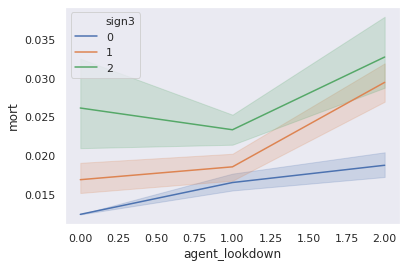

In [ ]:
#Although sometimes, when each severity group has very small number of rows inside, it may not exactly reflect what happened,
#It is desirable to see check all the trends and find how to interpret properly.

ax3 = sns.lineplot(x="agent_lookdown", y="mort", hue="sign3", data=agent_result)
ax3.grid()

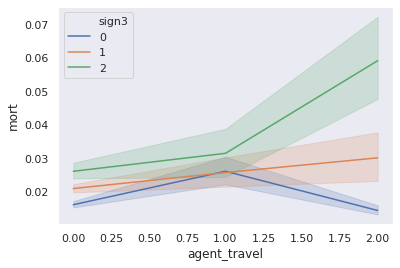

In [ ]:
ax4 = sns.lineplot(x="agent_travel", y="mort", hue="sign3", data=agent_result)
ax4.grid()
